**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc,
    confusion_matrix,
    matthews_corrcoef,
    classification_report,
    silhouette_score,
    adjusted_rand_score,
    normalized_mutual_info_score
)
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings('ignore')

**2. Dataset description**

**Load dataset**

In [ ]:
url = "https://raw.githubusercontent.com/Almausha/CSE422-Mushroom-Classification/refs/heads/main/mushroom_dataset.csv"

df = pd.read_csv(url, sep=';')




**Summarize data**

In [ ]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
df['class'].unique()


array(['p', 'e'], dtype=object)

In [ ]:
df.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
print ('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(df.shape,df.shape[0],df.shape[1]))

Shape of the dataset is (61069, 21). This dataset contains 61069 rows and 21 columns.


Feature Names and its Datatypes

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         



Numerical Features


In [ ]:
##Selecting numerical features
numerical_data = df.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 3 numerical features: 

['cap-diameter', 'stem-height', 'stem-width']


Categorical Features


In [ ]:
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 18 categorical features: 

['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


Descriptive Analysis

Summary satistics of Numerical Features

In [ ]:
# Transposed stats for numerical features

numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,61069.0,6.733854,5.264845,0.38,3.48,5.86,8.54,62.34
stem-height,61069.0,6.581538,3.370017,0.00,4.64,5.95,7.74,33.92
stem-width,61069.0,12.149410,10.035955,0.00,5.21,10.19,16.57,103.91


Summary satistics of Categorical features


In [ ]:
# Transposed stats for categorical features

categorical_data.describe().T

,count,unique,top,freq
class,61069,2,p,33888
cap-shape,61069,7,x,26934
cap-surface,46949,11,t,8196
cap-color,61069,12,n,24218
does-bruise-or-bleed,61069,2,f,50479
gill-attachment,51185,7,a,12698
gill-spacing,36006,3,c,24710
gill-color,61069,12,w,18521
stem-root,9531,5,s,3177
stem-surface,22945,8,s,6025


Variance of each numerical features

In [ ]:
numerical_data.var()

,0
cap-diameter,27.718592
stem-height,11.357014
stem-width,100.720394


Correlation Analysis

Correlation matrix of whole dataset

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix


,cap-diameter,stem-height,stem-width
cap-diameter,1.00000,0.422560,0.695330
stem-height,0.42256,1.000000,0.436117
stem-width,0.69533,0.436117,1.000000


Correlation Heatmap plot of  Numerical Features





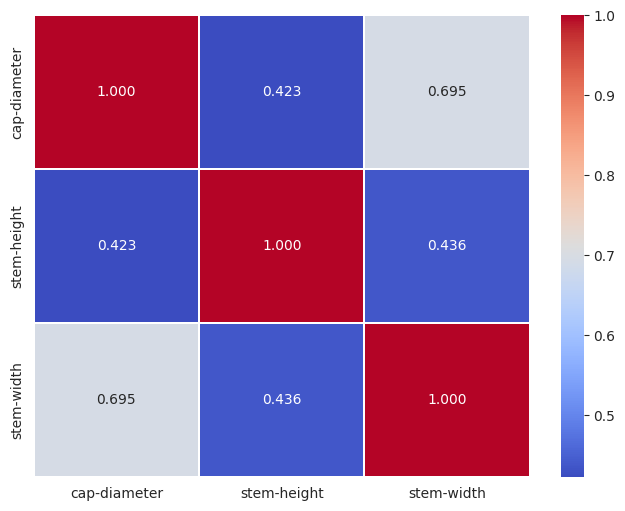

In [ ]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

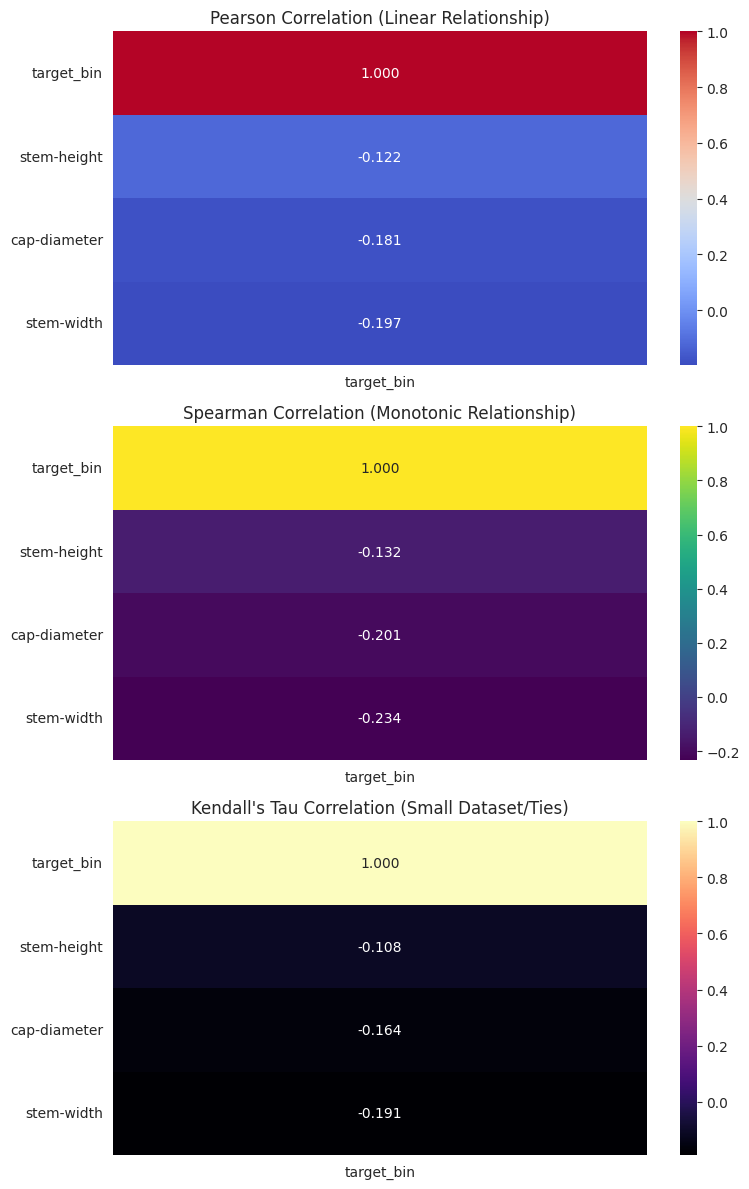

In [ ]:
numerical_data = df.select_dtypes(include='number').copy()

# Target Encode: class = {p, e} -> {1, 0}

df['target_bin'] = df['class'].map({'p': 1, 'e': 0})


numerical_with_target = numerical_data.copy()
numerical_with_target['target_bin'] = df['target_bin']


corr1 = numerical_with_target.corr(method='pearson')[['target_bin']].sort_values(by='target_bin', ascending=False)
corr2 = numerical_with_target.corr(method='spearman')[['target_bin']].sort_values(by='target_bin', ascending=False)
corr3 = numerical_with_target.corr(method='kendall')[['target_bin']].sort_values(by='target_bin', ascending=False)


fig, ax = plt.subplots(3, 1, figsize=(8, 12))


sns.heatmap(corr1, ax=ax[0], annot=True, cmap='coolwarm', fmt='.3f')
ax[0].set_title('Pearson Correlation (Linear Relationship)')

sns.heatmap(corr2, ax=ax[1], annot=True, cmap='viridis', fmt='.3f')
ax[1].set_title('Spearman Correlation (Monotonic Relationship)')

sns.heatmap(corr3, ax=ax[2], annot=True, cmap='magma', fmt='.3f')
ax[2].set_title("Kendall's Tau Correlation (Small Dataset/Ties)")

plt.tight_layout()
plt.show()

Check imbalance in the data

In [ ]:
df['class'].value_counts()


,count
class,
p,33888
e,27181


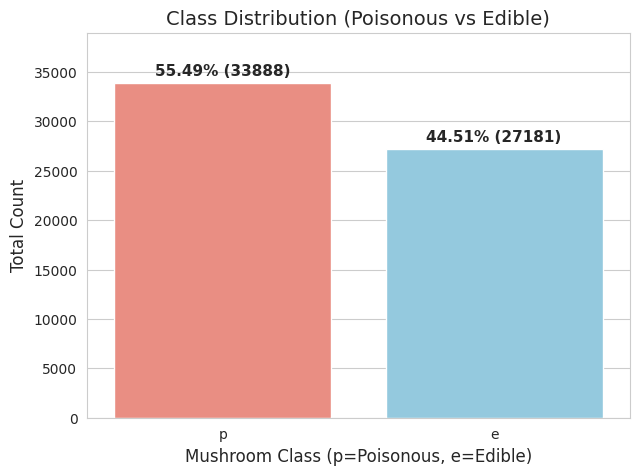

Percentage of class 'p' (Poisonous): 55.49%
Percentage of class 'e' (Edible): 44.51%


In [ ]:
counts = df['class'].value_counts()
total = len(df)
imbalance_df_plot = counts.reset_index()
imbalance_df_plot.columns = ['class', 'count']
imbalance_df_plot['percentage'] = (imbalance_df_plot['count'] / total) * 100

plt.figure(figsize=(7, 5))
ax = sns.barplot(data=imbalance_df_plot, x='class', y='count', palette=['salmon', 'skyblue'])


for i, p in enumerate(ax.patches):
    percentage = imbalance_df_plot['percentage'][i]
    count = int(imbalance_df_plot['count'][i])

    ax.annotate(f'{percentage:.2f}% ({count})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=11, fontweight='bold')

plt.title("Class Distribution (Poisonous vs Edible)", fontsize=14)
plt.xlabel("Mushroom Class (p=Poisonous, e=Edible)", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.ylim(0, max(imbalance_df_plot['count']) * 1.15)
plt.show()


print(f"Percentage of class 'p' (Poisonous): {imbalance_df_plot.iloc[0]['percentage']:.2f}%")
print(f"Percentage of class 'e' (Edible): {imbalance_df_plot.iloc[1]['percentage']:.2f}%")

Barplot of Outcome vs Percentage

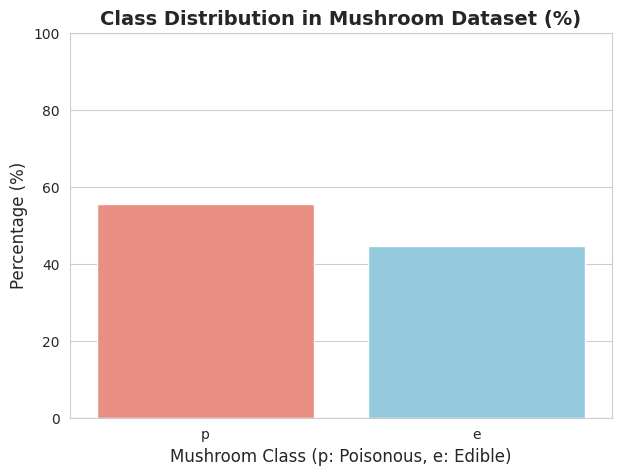

In [ ]:
counts = df['class'].value_counts()
percentage = (counts / len(df)) * 100


imbalance_df_plot = percentage.reset_index()
imbalance_df_plot.columns = ['class', 'percentage']


plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")


sns.barplot(data=imbalance_df_plot, x='class', y='percentage', palette=['salmon', 'skyblue'])


plt.title("Class Distribution in Mushroom Dataset (%)", fontsize=14, fontweight='bold')
plt.xlabel("Mushroom Class (p: Poisonous, e: Edible)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.ylim(0, 100)

plt.show()

Data visualization


Some other visualizations of features to get more insights

Skew in numerical features

In [ ]:
numerical_data.skew()

,0
cap-diameter,3.822844
stem-height,2.020904
stem-width,2.164957


Skewness Analysis

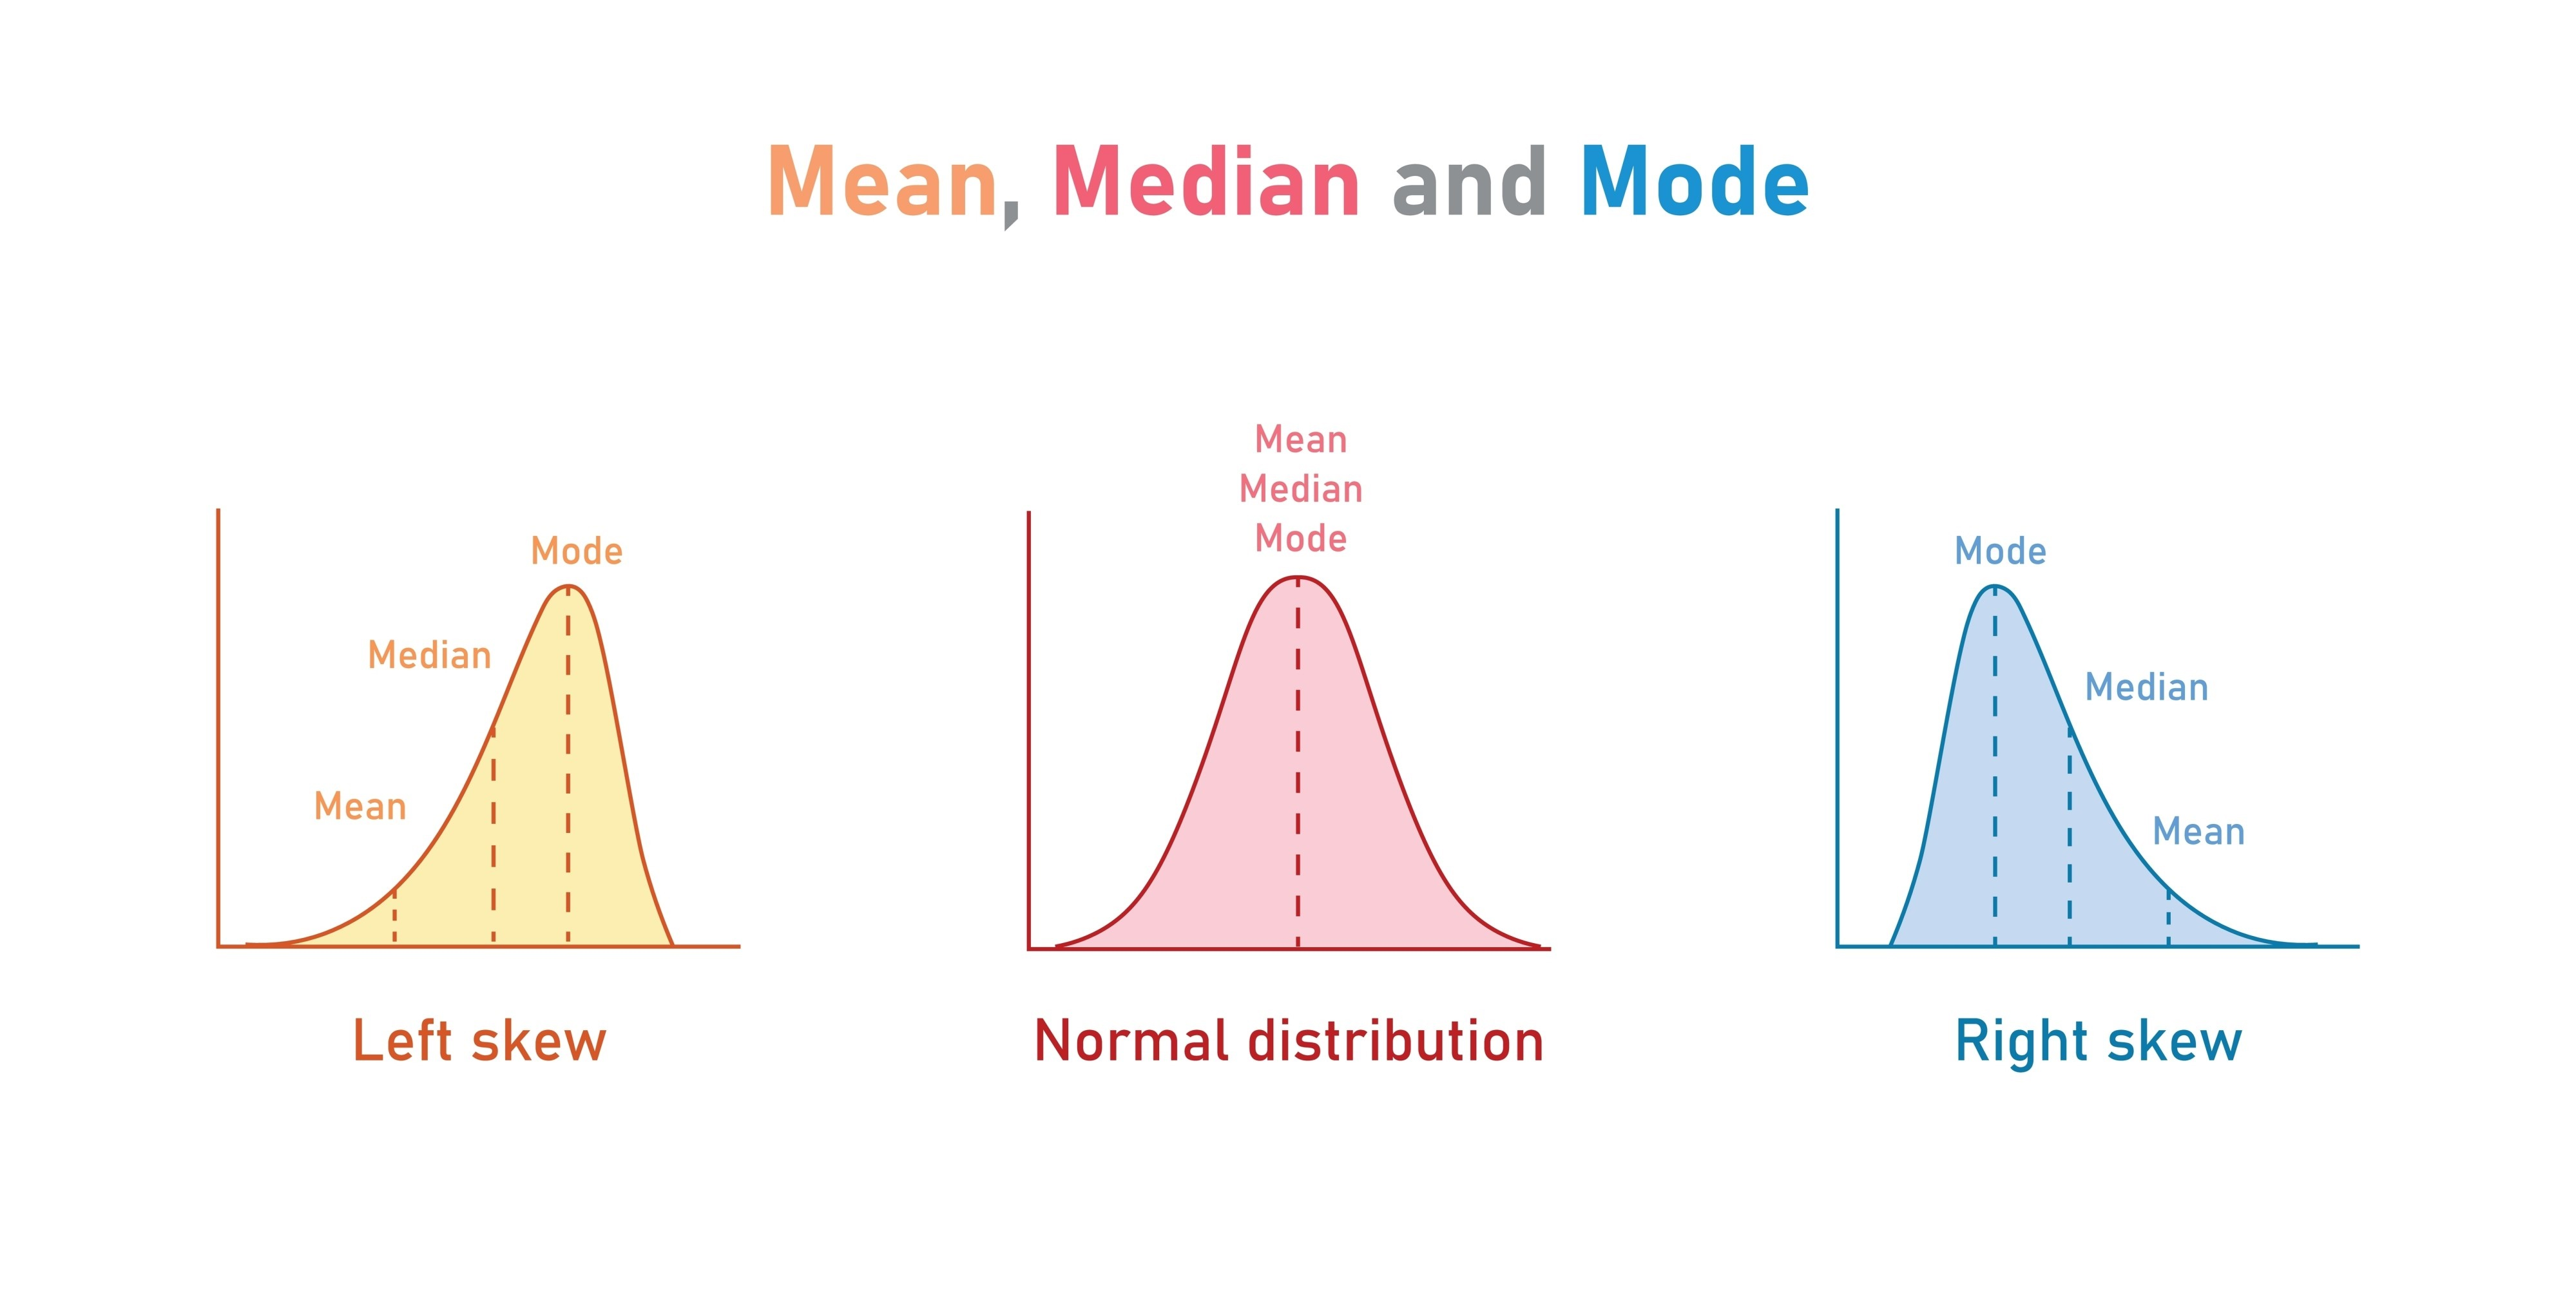

cap-diameter (3.823): Strongly Right-Skewed – The distribution has a long tail on the right side. This indicates that while most mushrooms have a small cap diameter, there are a few extreme outliers with very large caps.

stem-height (2.021): Highly Right-Skewed – Most mushroom stems fall within a specific short height range, but a few specimens are significantly taller, pulling the mean to the right.

stem-width (2.165): Strongly Right-Skewed – Similar to other features, the majority of mushrooms have thin stems, while a small number of mushrooms have exceptionally thick stems (outliers).

Histograms and Box Plot

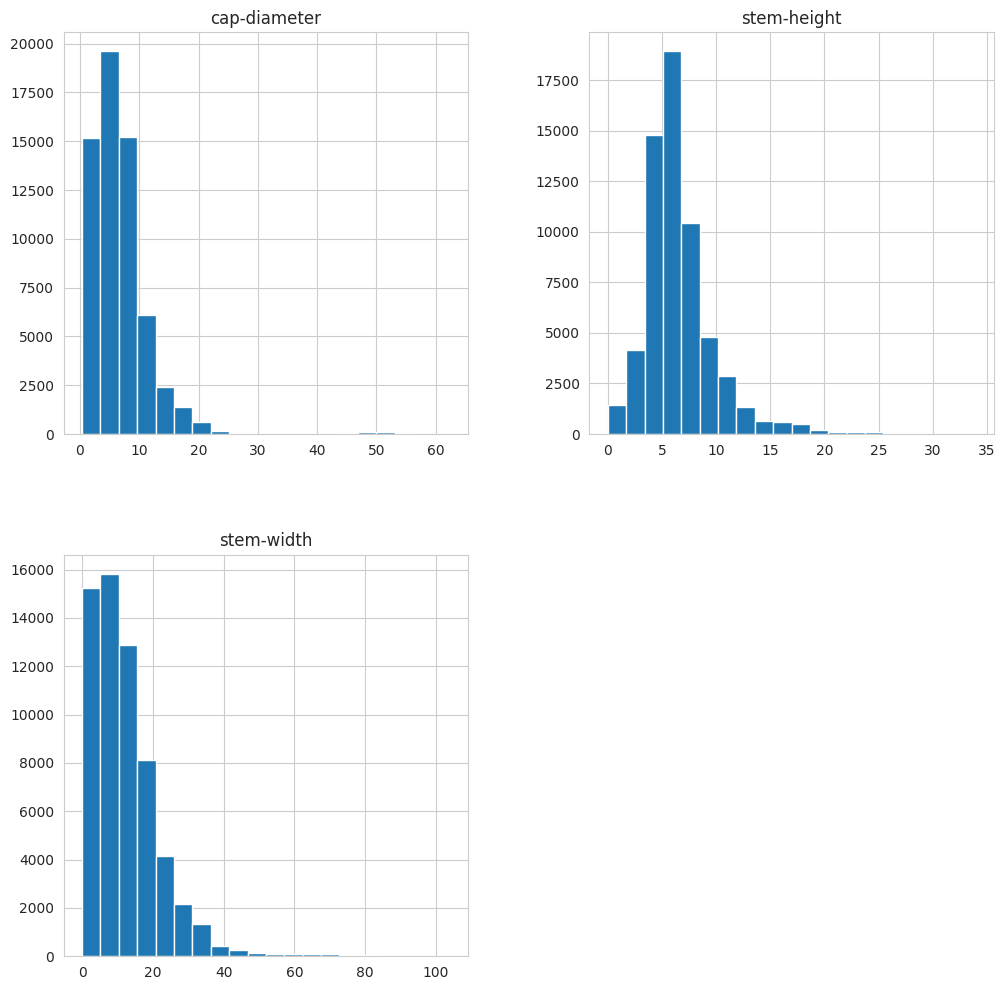

In [ ]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

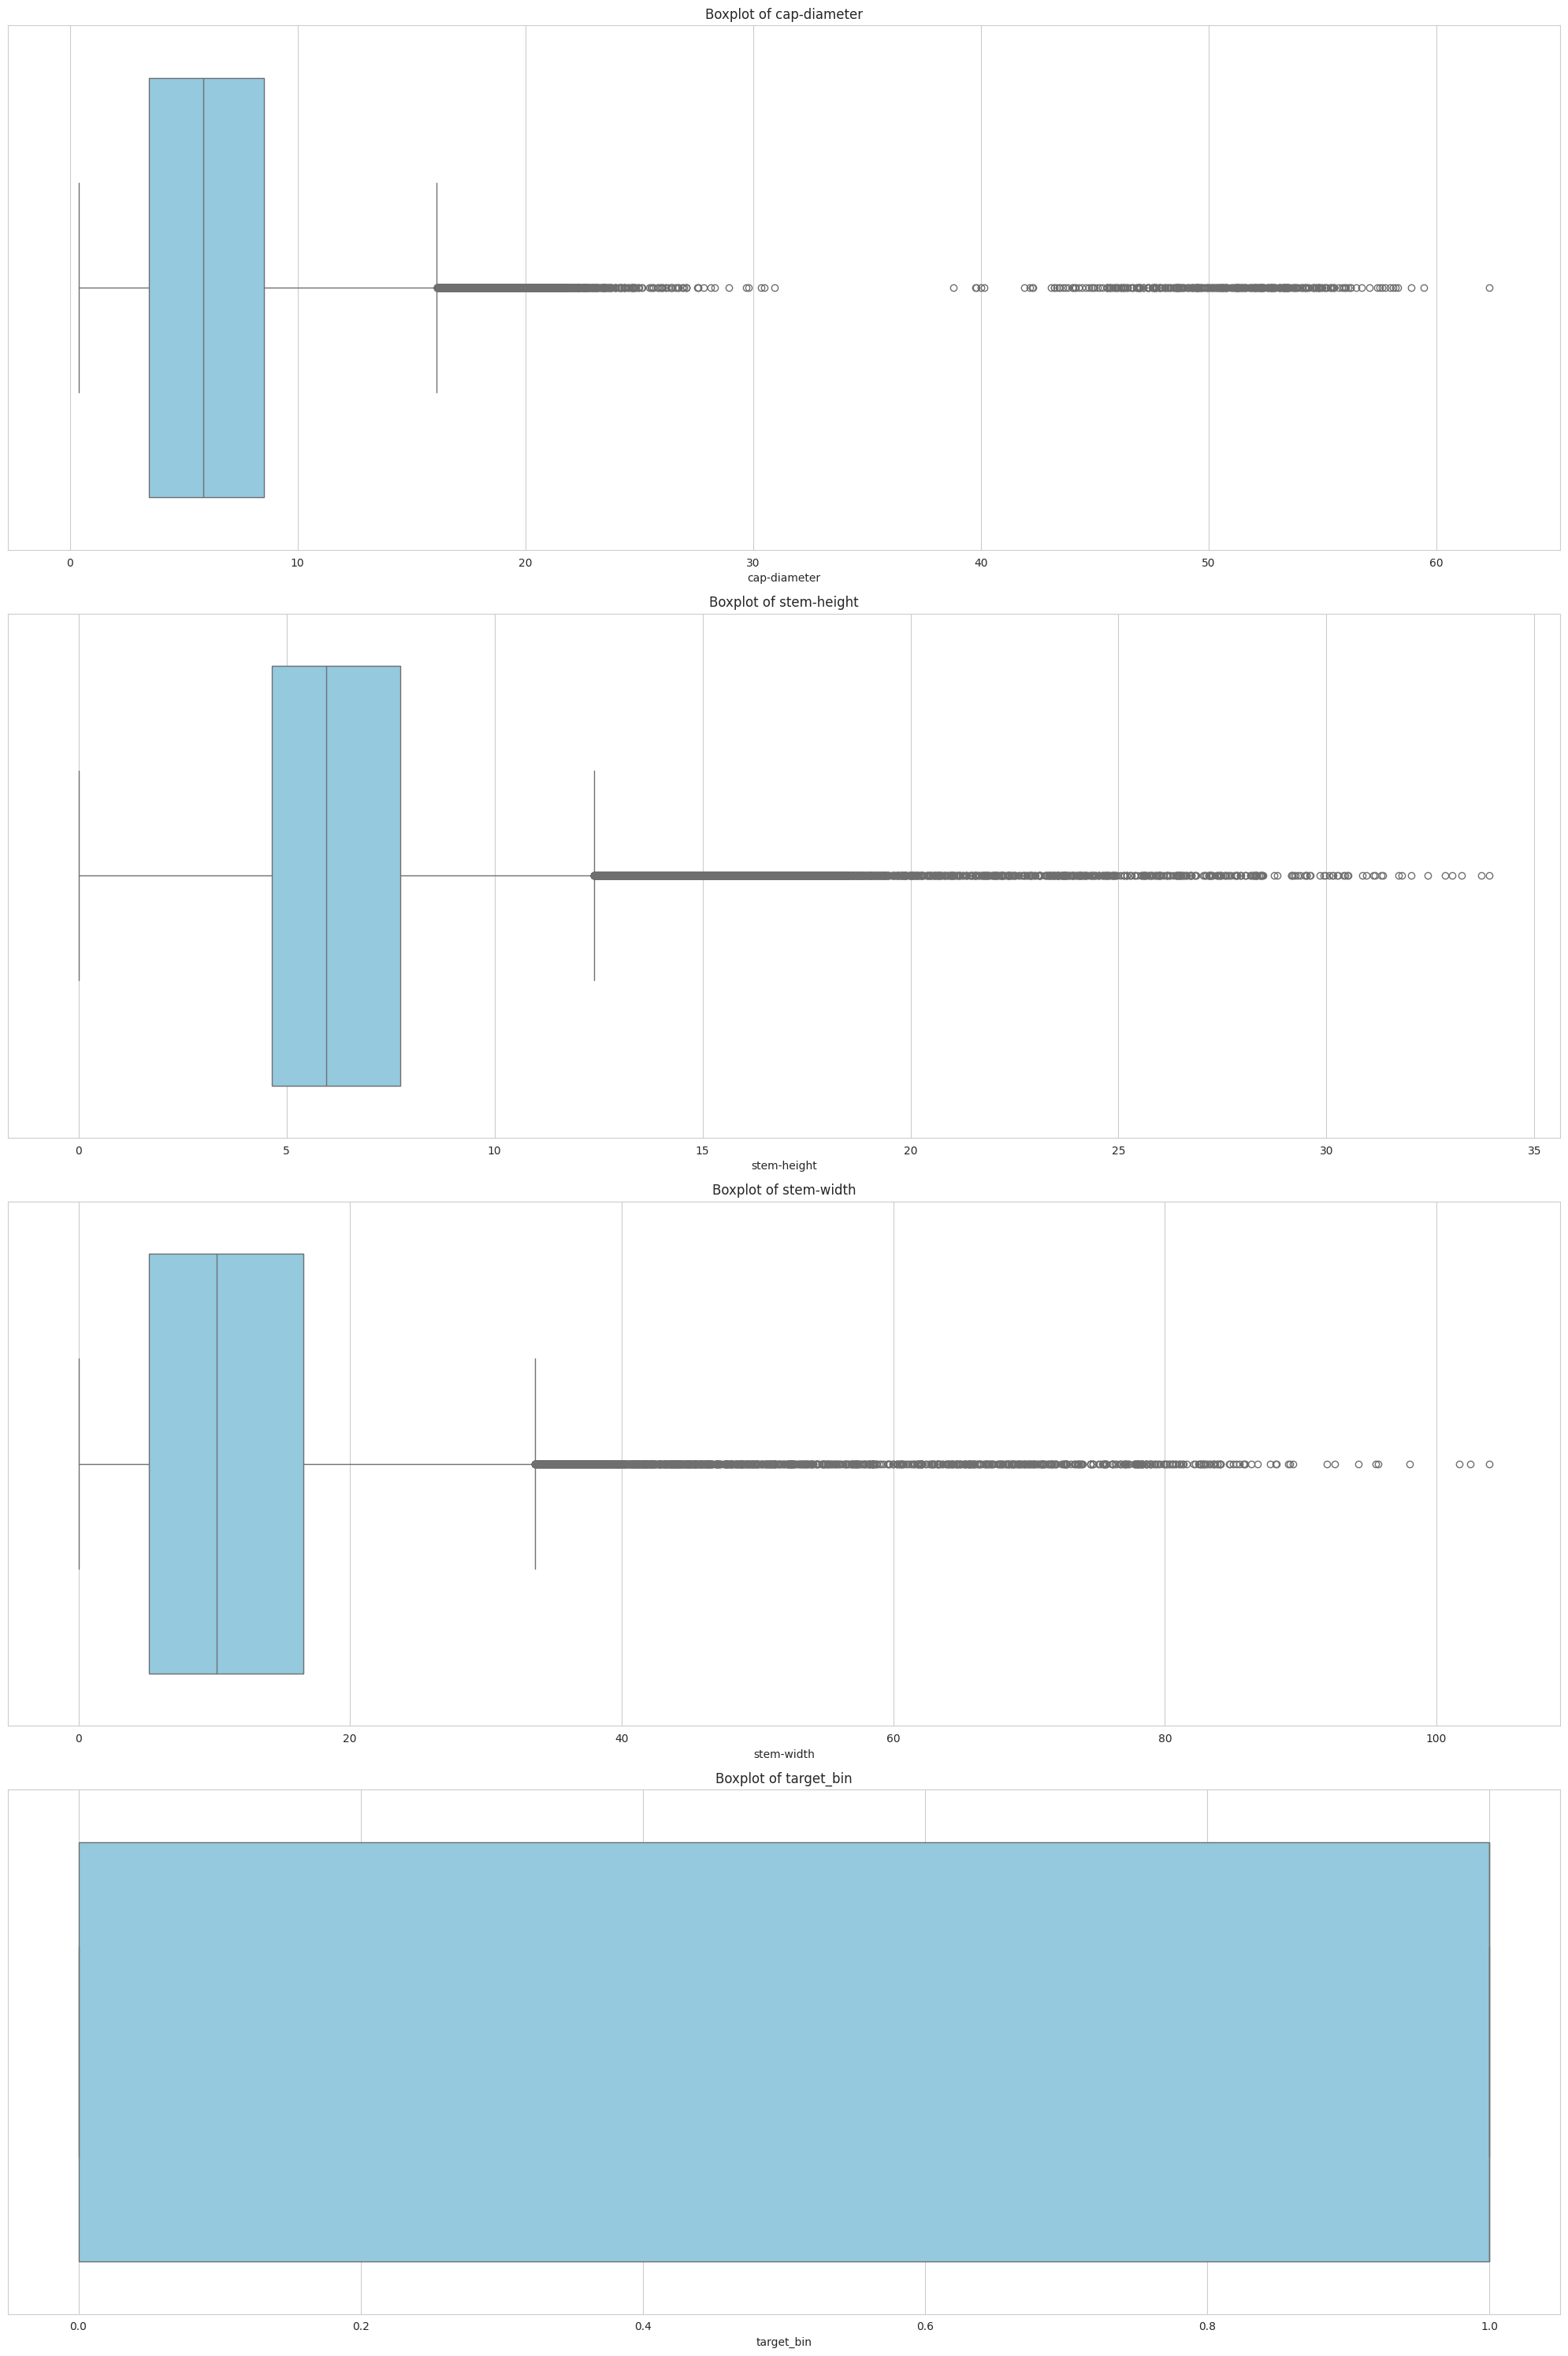

In [ ]:
# Select only numerical columns for boxplot analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(20, 30))

# Plot boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()


Number Unique values in each feature

In [ ]:
numerical_data.nunique()

,0
cap-diameter,2571
stem-height,2226
stem-width,4630


Missing Values

In [ ]:
numerical_data.isnull().sum()

,0
cap-diameter,0
stem-height,0
stem-width,0


Categorical Features


In [ ]:
# unique values counts
unique_counts=categorical_data.nunique()
print(unique_counts)

class                    2
cap-shape                7
cap-surface             11
cap-color               12
does-bruise-or-bleed     2
gill-attachment          7
gill-spacing             3
gill-color              12
stem-root                5
stem-surface             8
stem-color              13
veil-type                1
veil-color               6
has-ring                 2
ring-type                8
spore-print-color        7
habitat                  8
season                   4
dtype: int64


Barplot of unique value counts in every categorical features

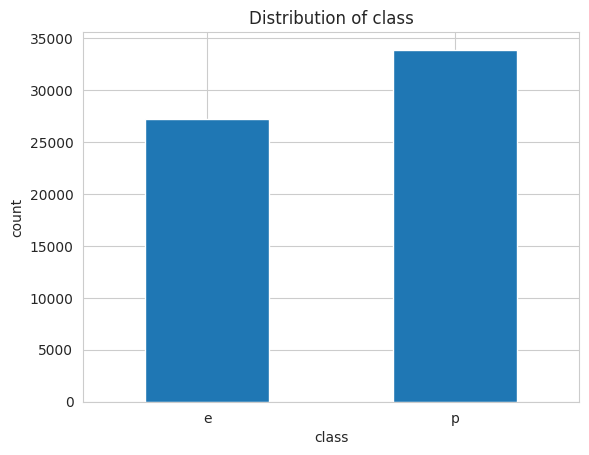

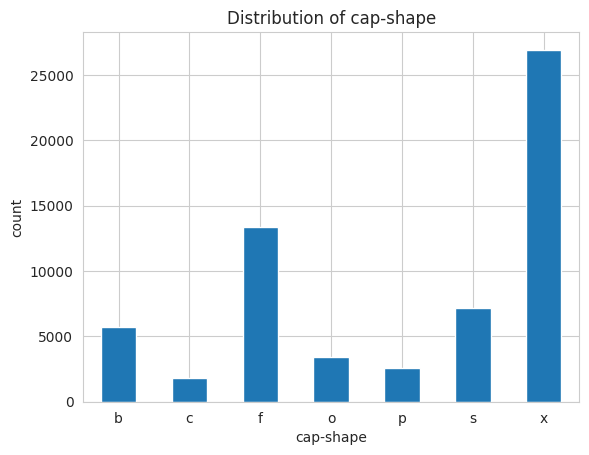

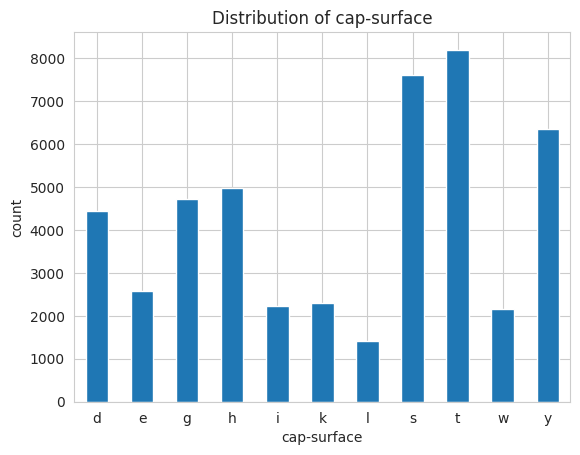

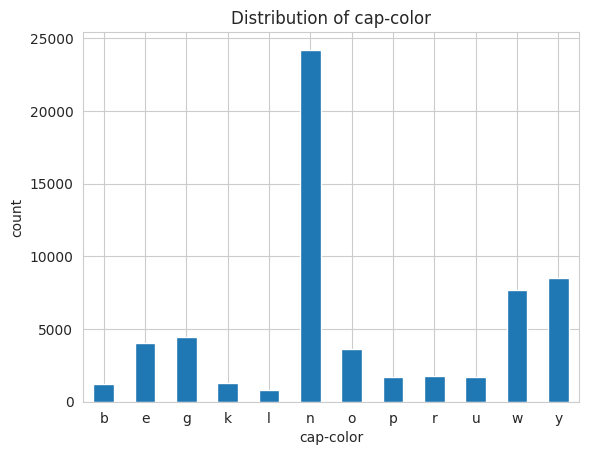

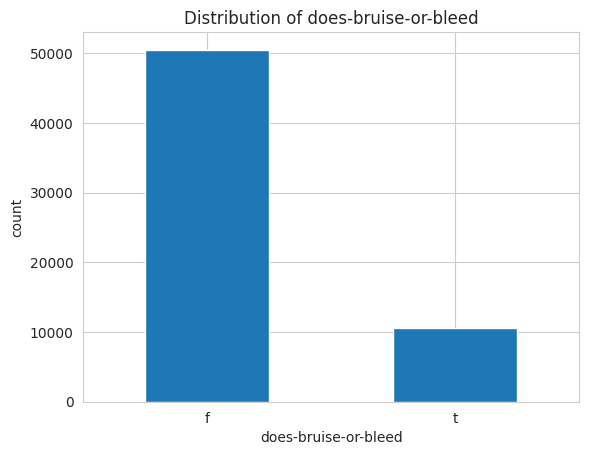

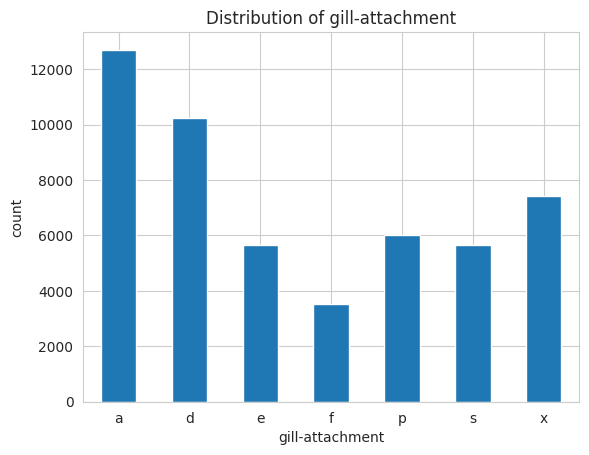

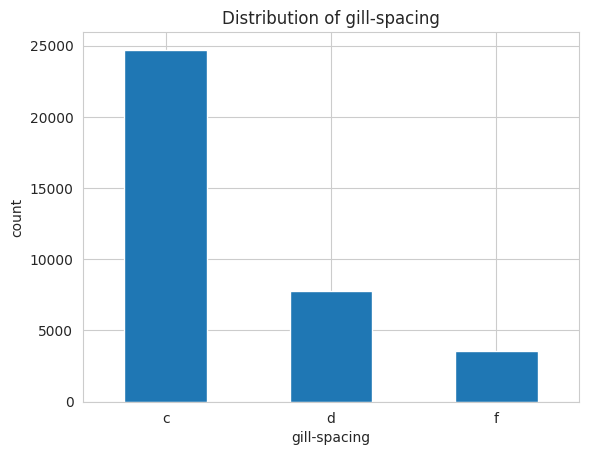

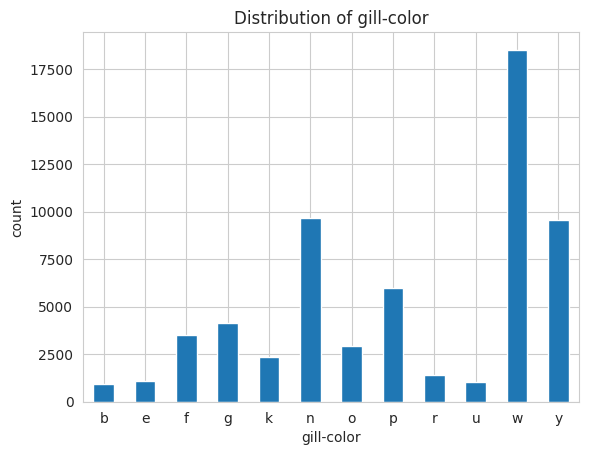

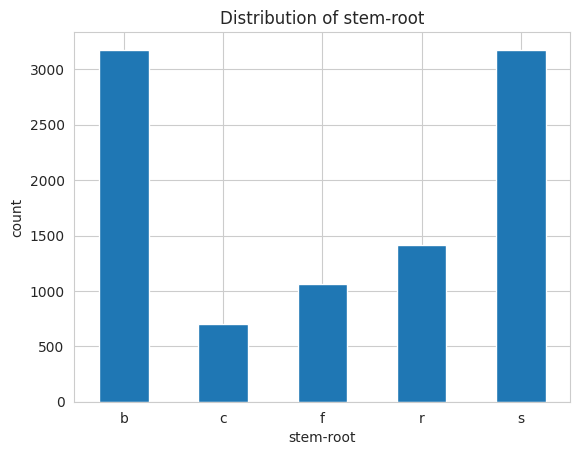

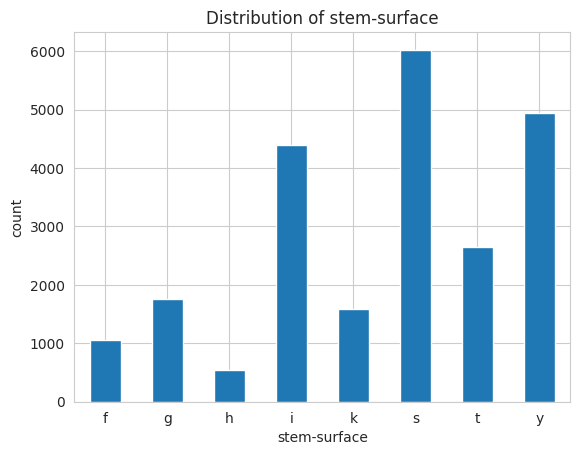

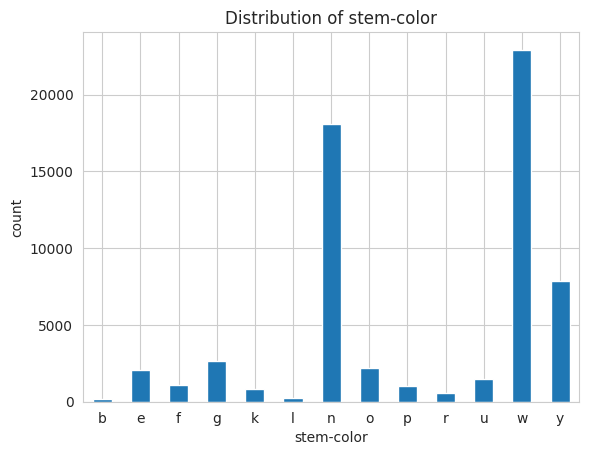

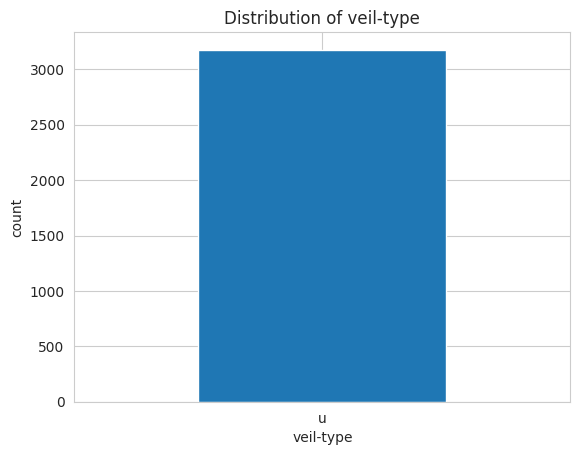

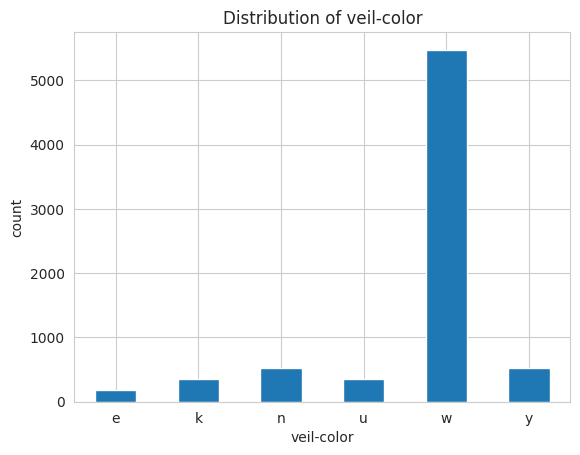

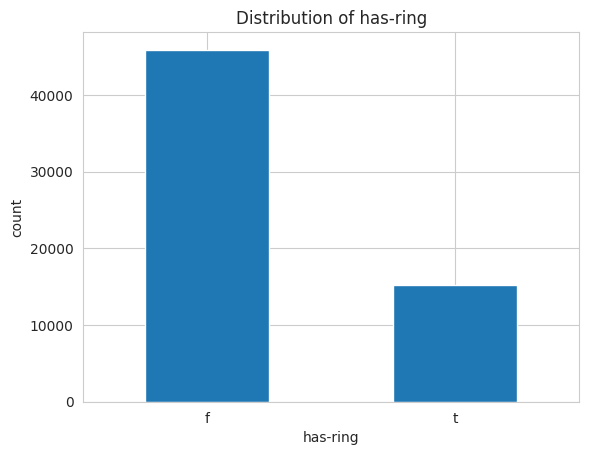

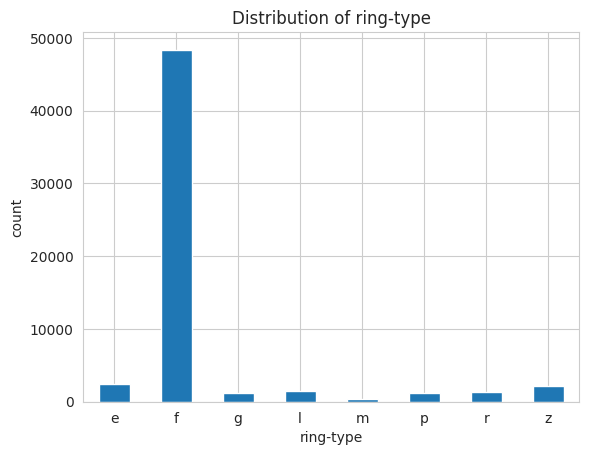

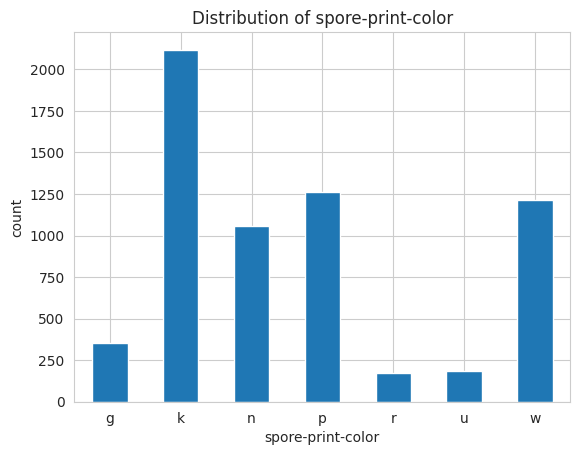

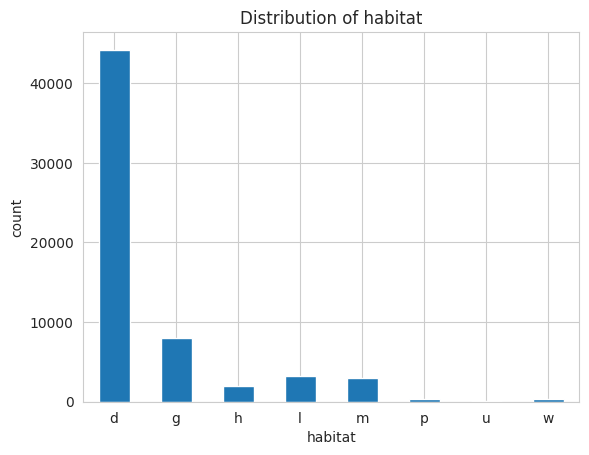

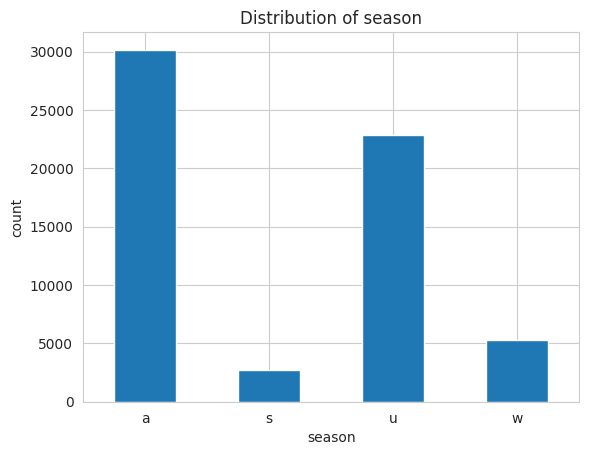

In [ ]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

Density plots of numerical features

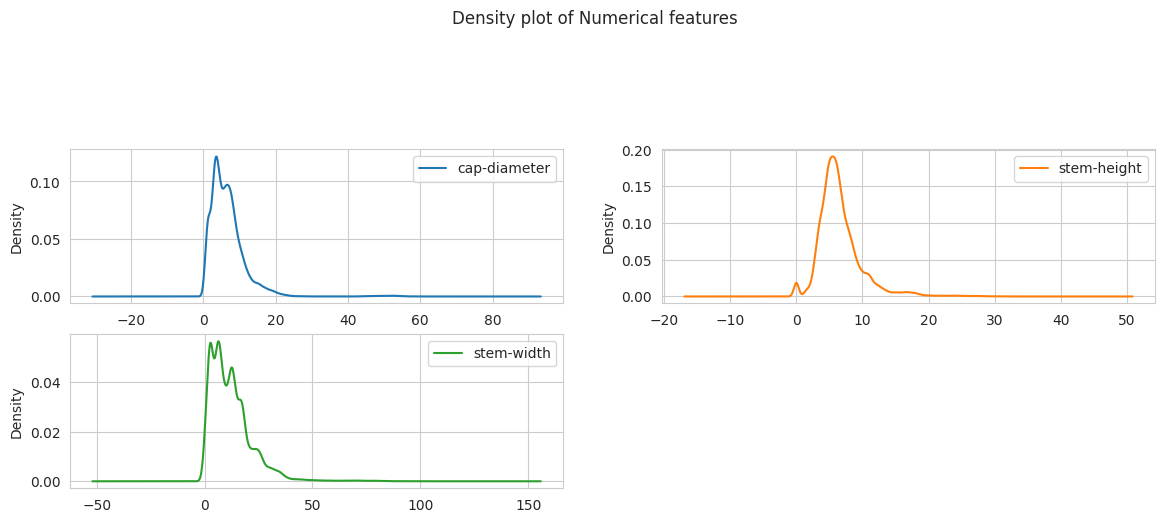

In [ ]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

Summary

We performed various exploratory data analysis (EDA) techniques, including univariate analysis, correlation studies, and visualizations on the mushroom dataset. Our analysis revealed that the dataset is well-balanced, with poisonous and edible categories distributed at approximately 55.49% and 44.51% respectively. Although there is a slight 10% difference between the two classes, it does not constitute a significant imbalance that would bias the model. The insights acquired through this EDA—such as identifying right-skewed numerical features and negative correlations with the target—will enable better decision-making during the feature engineering and machine learning model development stages.

3. Dataset pre-processing

Fault 1 : Null/ Missing Values

Check missing values

In [ ]:
df.isnull().sum() #counting the number of null values in the dataframe

,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-spacing,25063
gill-color,0
stem-height,0


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
veil-type,57892
spore-print-color,54715
veil-color,53656
stem-root,51538
stem-surface,38124
gill-spacing,25063
cap-surface,14120
gill-attachment,9884
ring-type,2471
does-bruise-or-bleed,0


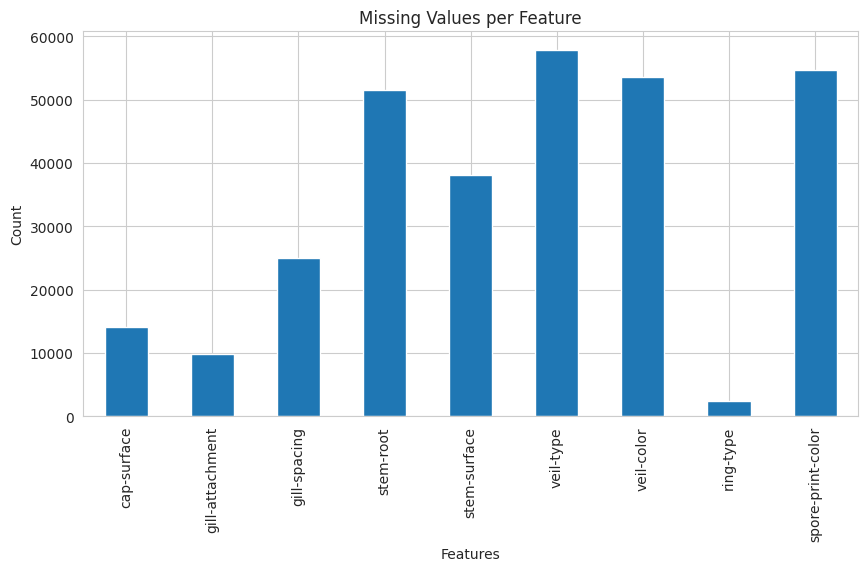

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(10,5))
missing.plot(kind='bar')
plt.title("Missing Values per Feature")
plt.ylabel("Count")
plt.xlabel("Features")
plt.show()


Solution 1: Drop columns with excessive missing values

In [ ]:
drop_cols = ['veil-type', 'veil-color', 'stem-root', 'stem-surface', 'spore-print-color']
df = df.drop(columns=drop_cols)


Columns with very high missing percentage were removed

Keeping them would reduce model performance

Fault 2: Remaining Missing Values

In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
gill-spacing,25063
cap-surface,14120
gill-attachment,9884
ring-type,2471
class,0
cap-color,0
cap-shape,0
does-bruise-or-bleed,0
cap-diameter,0
gill-color,0


Solution 2: Fill remaining missing values with mode

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

print(df[categorical_cols].isnull().sum())


class                   0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


Mode imputation is suitable for categorical features

Prevents loss of data

After these imputation steps, all missing values in the identified columns have been handled.

In [ ]:
#Feature Segregation
categorical = df.select_dtypes(include = ['object','category']).columns
if(len(categorical) == 0):
  print(f"Categorical columns : 0")
else:
  print(f"Categorical Columns: {categorical}")
numeric = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerical Columns: {numeric}")


Categorical Columns: Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')
Numerical Columns: Index(['cap-diameter', 'stem-height', 'stem-width', 'target_bin'], dtype='object')


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0
stem-height,0


Fault 3.Categorical Values

Solution 3: Encoding Categorical Values

Dataset Splitting


Feature Scaling

In [ ]:
#  Target (y) and Features (X)
X = df.drop('class', axis=1)
y = df['class']

# Target Variable Encoding(p/e → 0/1)
le = LabelEncoder()
y = le.fit_transform(y)



# Feature Encoding (One-Hot Encoding)

X = pd.get_dummies(X, drop_first=True)

print(f"Total features after encoding: {X.shape[1]}")

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Feature Scaling (Standardization)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualization
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Preprocessing Done!")
print(f"Training shape: {X_train_final.shape}")
print(f"Testing shape: {X_test_final.shape}")


Total features after encoding: 81
Preprocessing Done!
Training shape: (48855, 81)
Testing shape: (12214, 81)


In [ ]:
num_cols = ['cap-diameter', 'stem-height', 'stem-width']

print("--- Original Numerical Data (Before Scaling) ---")
print(df[num_cols].head())

print("\n--- Processed & Scaled Numerical Data (After Scaling) ---")

print(X_train_final[num_cols].head())

--- Original Numerical Data (Before Scaling) ---
   cap-diameter  stem-height  stem-width
0         15.26        16.95       17.09
1         16.60        17.99       18.19
2         14.07        17.80       17.74
3         14.17        15.77       15.98
4         14.64        16.53       17.20

--- Processed & Scaled Numerical Data (After Scaling) ---
   cap-diameter  stem-height  stem-width
0     -0.195867    -0.104756   -0.639647
1      0.039043    -0.801696   -0.439222
2      0.313735     1.253535    0.218893
3     -0.616430    -0.736450   -0.574833
4     -0.654319    -0.819490   -0.613722


Correlation heatmap


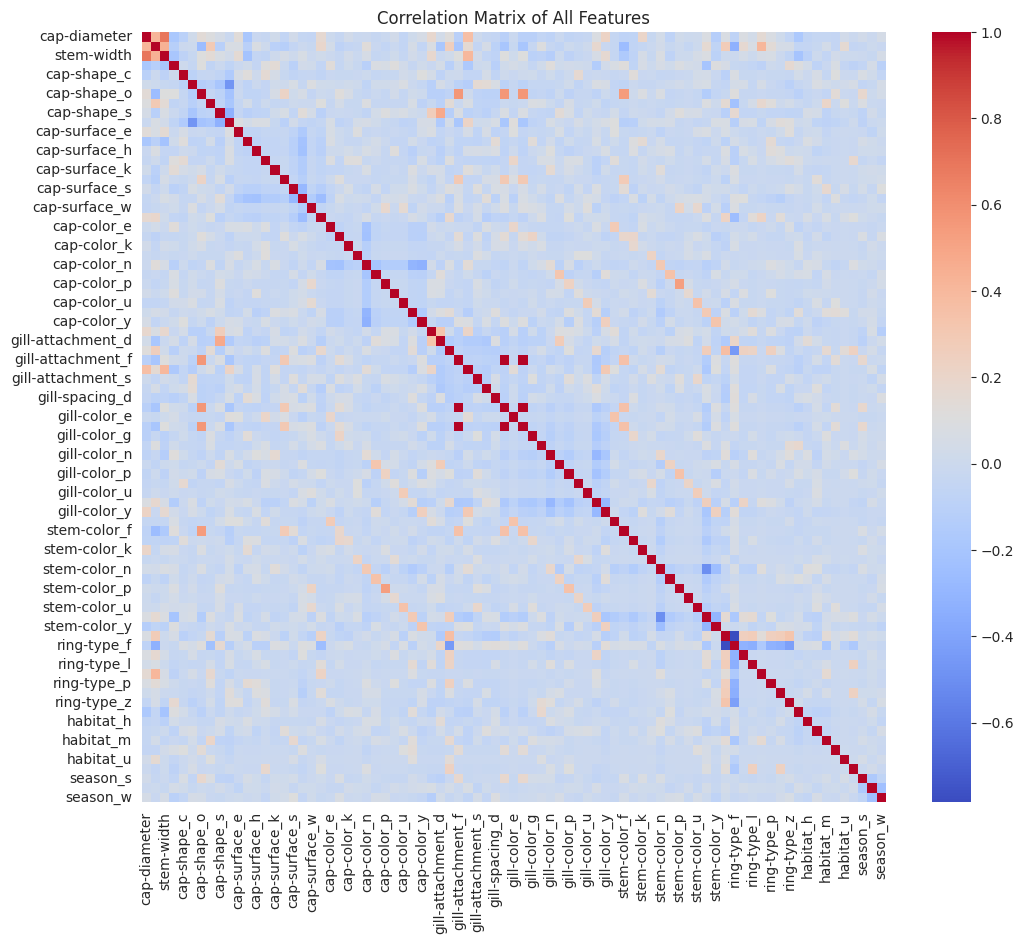

Potential Leaking Columns (High Correlation >= 0.95): 
['target_bin']


In [ ]:
#Heatmap Plot (On Var x)
plt.figure(figsize=(12,10))
correlation_matrix = X_train_final.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of All Features")
plt.show()

# Checking Data leakage
# correlation of y_train and X_train_final
corr_with_target = X_train_final.apply(lambda x: x.corr(pd.Series(y_train)))
leak_cols = corr_with_target[abs(corr_with_target) >= 0.95].index.tolist()

if leak_cols:
    print(f"Potential Leaking Columns (High Correlation >= 0.95): \n{leak_cols}")
else:
    print("No severe data leakage detected (Threshold 0.95).")

In [ ]:
#Differentiating Leakage and target

X = df.drop(['class', 'target_bin'], axis=1, errors='ignore')
y = df['class']

# Target Encoding
le = LabelEncoder()
y = le.fit_transform(y)

# Feature Encoding
X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Leakage column 'target_bin' dropped and data re-scaled!")

Leakage column 'target_bin' dropped and data re-scaled!


Training the Model

We will use the following algorithms to train our model:

Decision Tree

Logistic Regression

Neural Network

K mean Clustering

In [ ]:
def get_scores_for_roc(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        s = model.decision_function(X)
        s_min, s_max = s.min(), s.max()
        if s_max - s_min > 1e-9:
            s = (s - s_min) / (s_max - s_min)
        return s
    return model.predict(X)

def evaluate_classifier(model, name, X_train_set, X_test_set, y_train_set, y_test_set):
    model.fit(X_train_set, y_train_set)
    y_pred = model.predict(X_test_set)
    y_score = get_scores_for_roc(model, X_test_set)

    acc = accuracy_score(y_test_set, y_pred)
    prec = precision_score(y_test_set, y_pred, zero_division=0)
    rec = recall_score(y_test_set, y_pred, zero_division=0)
    f1 = f1_score(y_test_set, y_pred, zero_division=0)
    auc = roc_auc_score(y_test_set, y_score)

    print(f"\n{name}")
    print("-" * len(name))
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"AUC      : {auc:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test_set, y_pred, digits=4))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test_set, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix — {name}")
    plt.show()

    # ROC data collection
    fpr, tpr, _ = roc_curve(y_test_set, y_score)
    return {"Model": name, "Accuracy": acc, "Precision": prec,
            "Recall": rec, "F1": f1, "AUC": auc, "fpr": fpr, "tpr": tpr}

Decision Tree



Decision Tree
-------------
Accuracy : 0.9464
Precision: 0.9805
Recall   : 0.9217
F1-score : 0.9502
AUC      : 0.9837

Classification report:
              precision    recall  f1-score   support

           0     0.9091    0.9772    0.9419      5436
           1     0.9805    0.9217    0.9502      6778

    accuracy                         0.9464     12214
   macro avg     0.9448    0.9494    0.9461     12214
weighted avg     0.9488    0.9464    0.9465     12214



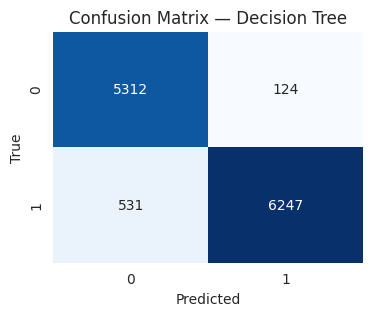

Decision Tree Training Accuracy: 0.9472
Decision Tree Testing Accuracy : 0.9464


In [ ]:
dt_classifier = DecisionTreeClassifier(
    max_depth=12,
    criterion='gini',
    random_state=42
)

dt_results = evaluate_classifier(
    dt_classifier,
    "Decision Tree",
    X_train_final,
    X_test_final,
    y_train,
    y_test
)


y_train_pred = dt_classifier.predict(X_train_final)


train_acc = accuracy_score(y_train, y_train_pred)

print(f"Decision Tree Training Accuracy: {train_acc:.4f}")
print(f"Decision Tree Testing Accuracy : {dt_results['Accuracy']:.4f}")

Logistic Regression



Logistic Regression
-------------------
Accuracy : 0.7773
Precision: 0.8003
Recall   : 0.7977
F1-score : 0.7990
AUC      : 0.8580

Classification report:
              precision    recall  f1-score   support

           0     0.7488    0.7518    0.7503      5436
           1     0.8003    0.7977    0.7990      6778

    accuracy                         0.7773     12214
   macro avg     0.7746    0.7748    0.7747     12214
weighted avg     0.7774    0.7773    0.7773     12214



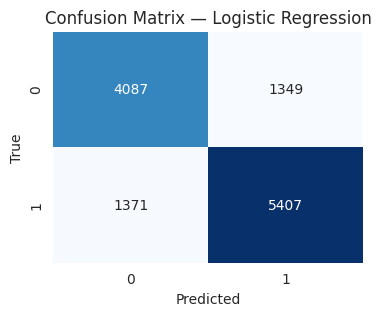

Logistic Regression Training Accuracy: 0.7787
Logistic Regression Testing Accuracy : 0.7773


In [ ]:
lr_classifier = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    random_state=42
)

lr_results = evaluate_classifier(
    lr_classifier,
    "Logistic Regression",
    X_train_final,
    X_test_final,
    y_train,
    y_test
)

y_train_pred_lr = lr_classifier.predict(X_train_final)


lr_train_acc = accuracy_score(y_train, y_train_pred_lr)


print(f"Logistic Regression Training Accuracy: {lr_train_acc:.4f}")
print(f"Logistic Regression Testing Accuracy : {lr_results['Accuracy']:.4f}")


Neural Network

In [ ]:

mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_final.shape[1],)), # Hidden Layer 1
    Dropout(0.2),                                                        # Overfitting রোধে
    Dense(64, activation='relu'),                                         # Hidden Layer 2
    Dense(1, activation='sigmoid')                                       # Output Layer (0 or 1)
])


mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print("Training Neural Network (MLP)...")
history = mlp_model.fit(
    X_train_final, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


y_prob = mlp_model.predict(X_test_final)
y_pred_nn = (y_prob > 0.5).astype(int).flatten()

nn_test_acc = accuracy_score(y_test, y_pred_nn)


y_train_prob = mlp_model.predict(X_train_final)
y_train_pred_nn = (y_train_prob > 0.5).astype(int).flatten()
nn_train_acc = accuracy_score(y_train, y_train_pred_nn)

print(f"\nNeural Network Training Accuracy: {nn_train_acc:.4f}")
print(f"Neural Network Testing Accuracy : {nn_test_acc:.4f}")

Training Neural Network (MLP)...
Epoch 1/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8271 - loss: 0.3653 - val_accuracy: 0.9909 - val_loss: 0.0331
Epoch 2/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9831 - loss: 0.0489 - val_accuracy: 0.9951 - val_loss: 0.0127
Epoch 3/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9929 - loss: 0.0228 - val_accuracy: 0.9981 - val_loss: 0.0070
Epoch 4/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9949 - loss: 0.0153 - val_accuracy: 0.9986 - val_loss: 0.0055
Epoch 5/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9954 - loss: 0.0130 - val_accuracy: 0.9980 - val_loss: 0.0056
Epoch 6/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9967 - loss: 0.0102 - val_accuracy: 0.9985 - val_loss: 0.0035
Epoch 7/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9969 - loss: 0.0080 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 8/20
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9981 


--- MLP Neural Network Detailed Report ---
              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999      5436
           1     0.9999    1.0000    0.9999      6778

    accuracy                         0.9999     12214
   macro avg     0.9999    0.9999    0.9999     12214
weighted avg     0.9999    0.9999    0.9999     12214



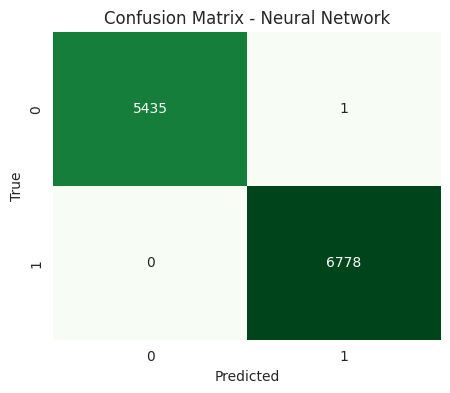

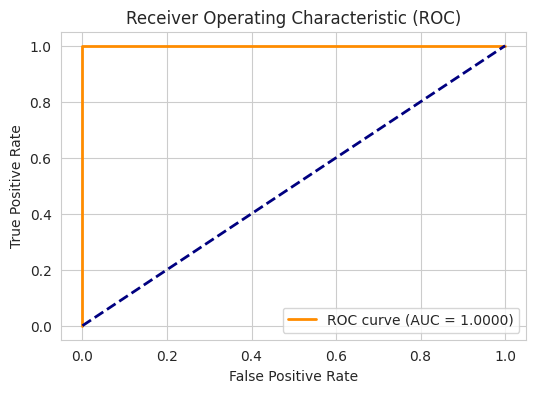

In [ ]:
print("\n--- MLP Neural Network Detailed Report ---")
print(classification_report(y_test, y_pred_nn, digits=4))

#Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#  ROC Curve and AUC
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(6,4))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

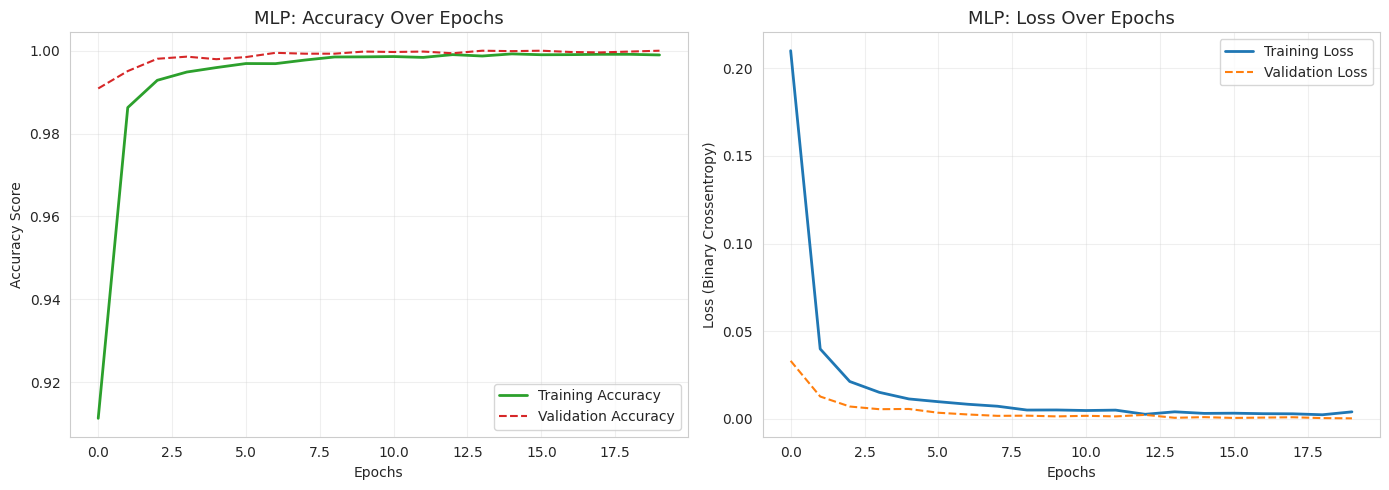

In [ ]:
#  Neural Network Learning Curves
plt.figure(figsize=(14, 5))

# Accuracy Graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#2ca02c', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#d62728', linestyle='--')
plt.title('MLP: Accuracy Over Epochs', fontsize=13)
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='#1f77b4', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='#ff7f0e', linestyle='--')
plt.title('MLP: Loss Over Epochs', fontsize=13)
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

6.Model selection/Comparison analysis


Comparison of the Models
We compare:

Accuracy / Precision / Recall / F1 / AUC (bar chart)
ROC curves (one plot)

Final Model Performance Table 
              Model  Accuracy  Precision   Recall       F1      AUC
     Neural Network  0.999918   0.999852 1.000000 0.999926 1.000000
      Decision Tree  0.946373   0.980537 0.921658 0.950186 0.983652
Logistic Regression  0.777305   0.800326 0.797728 0.799025 0.858004


<Figure size 1200x600 with 0 Axes>

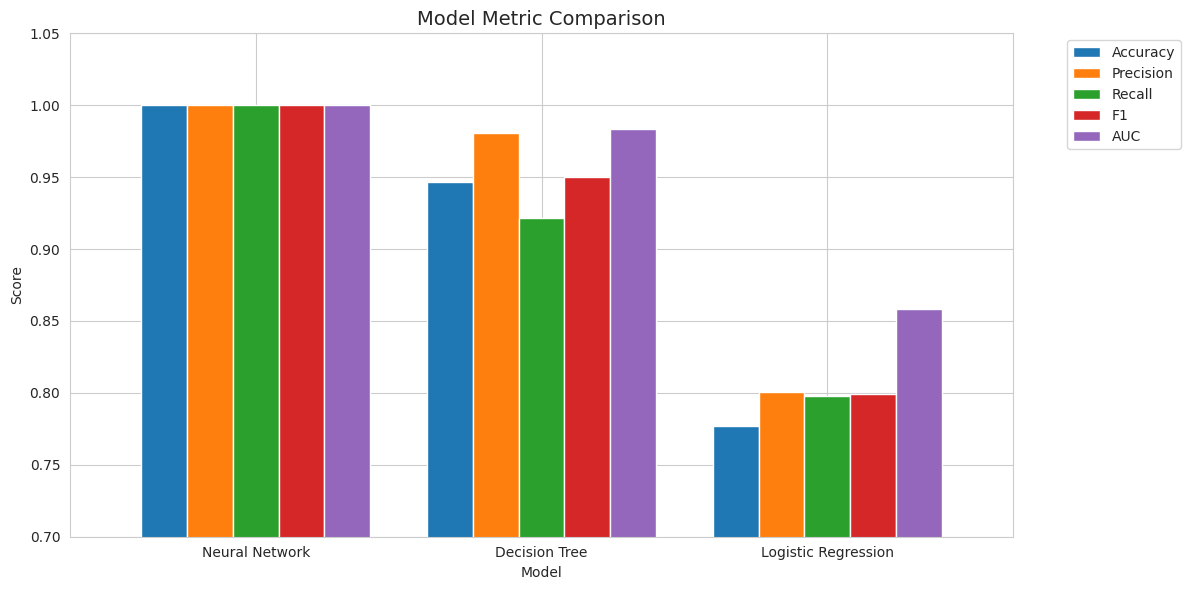

In [ ]:
#Bar chart showcasing prediction accuracy of all models

results = []
models_to_test = {
    "Logistic Regression": (lr_classifier, X_test_final),
    "Decision Tree": (dt_classifier, X_test_final),
    "Neural Network": (mlp_model, X_test_final)
}

for name, (model, x_data) in models_to_test.items():
    if name == "Neural Network":
        y_prob = model.predict(x_data, verbose=0).flatten()
        y_pred = (y_prob > 0.5).astype(int)
    else:
        y_prob = model.predict_proba(x_data)[:, 1]
        y_pred = model.predict(x_data)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values("AUC", ascending=False)


print("Final Model Performance Table ")
print(results_df.to_string(index=False))


plt.figure(figsize=(12, 6))

results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1", "AUC"]].plot(
    kind="bar", figsize=(12, 6), width=0.8
)

plt.xticks(rotation=0, ha="center")
plt.title("Model Metric Comparison", fontsize=14)
plt.ylabel("Score")
plt.ylim(0.7, 1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

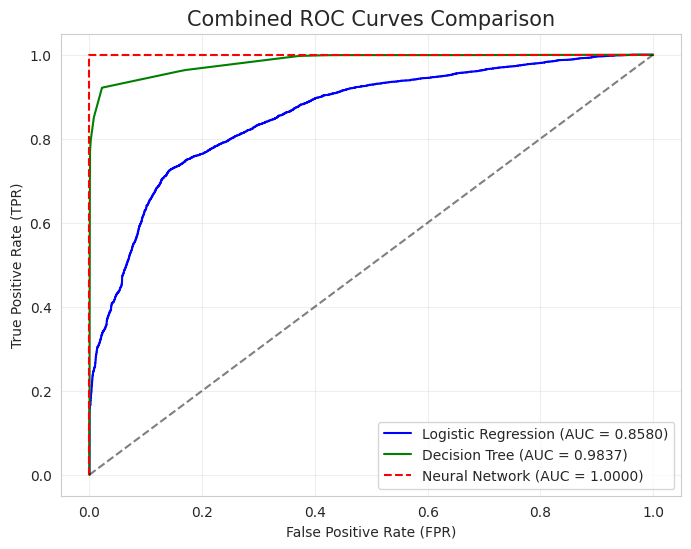

In [ ]:
#Auc Score and Roc Curve
y_prob_lr = lr_classifier.predict_proba(X_test_final)[:, 1]
y_prob_dt = dt_classifier.predict_proba(X_test_final)[:, 1]


plt.figure(figsize=(8, 6))

# Logistic Regression Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.4f})', color='blue')

# Decision Tree Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.4f})', color='green')

# Neural Network Curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc(fpr_nn, tpr_nn):.4f})', color='red', linestyle='--')


plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Combined ROC Curves Comparison', fontsize=15)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

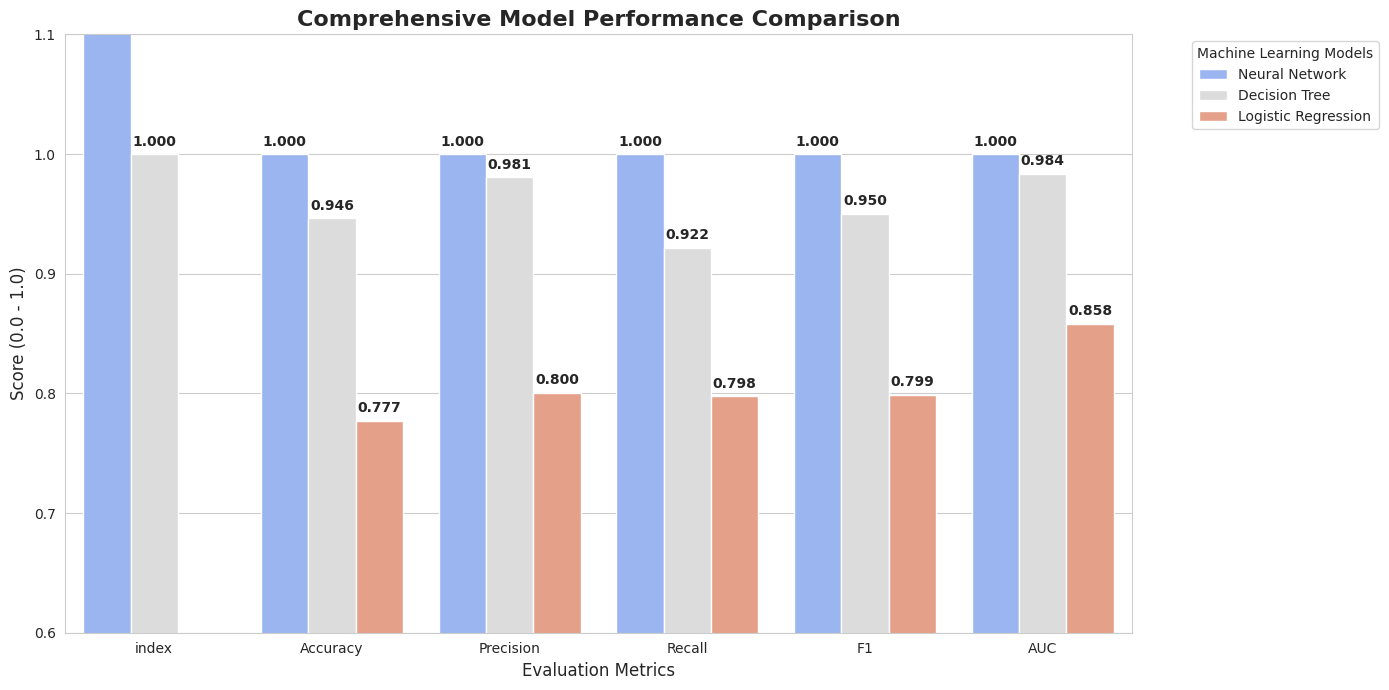

In [ ]:
#Precision, recall comparison of each model.
df_plot = results_df.reset_index().melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")


ax = sns.barplot(data=df_plot, x='Metric', y='Score', hue='Model', palette='coolwarm')


for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.3f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points',
                    fontsize=10, fontweight='bold')

plt.title('Comprehensive Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Score (0.0 - 1.0)', fontsize=12)
plt.xlabel('Evaluation Metrics', fontsize=12)
plt.ylim(0.6, 1.1)
plt.legend(title='Machine Learning Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#KFold Cross Valdation
print("--- Starting 5-Fold Cross Validation ---")


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = { "Logistic Regression": [], "Decision Tree": [], "Neural Network": [] }

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_final, y_train), 1):
    print(f"Processing Fold {fold}...")

    X_train_fold, X_val_fold = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]

    if hasattr(y_train, 'iloc'):
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    else:
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # --- A. Logistic Regression ---
    lr_classifier.fit(X_train_fold, y_train_fold)
    cv_results["Logistic Regression"].append(accuracy_score(y_val_fold, lr_classifier.predict(X_val_fold)))

    # --- B. Decision Tree ---
    dt_classifier.fit(X_train_fold, y_train_fold)
    cv_results["Decision Tree"].append(accuracy_score(y_val_fold, dt_classifier.predict(X_val_fold)))

    # --- C. Neural Network ---
    fold_nn = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_final.shape[1],)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    fold_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    fold_nn.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, verbose=0)

    nn_val_prob = fold_nn.predict(X_val_fold, verbose=0)
    nn_val_pred = (nn_val_prob > 0.5).astype(int).flatten()
    cv_results["Neural Network"].append(accuracy_score(y_val_fold, nn_val_pred))


cv_map = {name: np.mean(scores) for name, scores in cv_results.items()}

results_df['CV_Mean_Accuracy'] = results_df['Model'].map(cv_map)


supervised_only_df = results_df[results_df['Model'].isin(["Logistic Regression", "Decision Tree", "Neural Network"])]

print("\n--- K-Fold Validation Complete (Supervised Models Only) ---")
print(supervised_only_df[["Model", "Accuracy", "CV_Mean_Accuracy"]].to_string(index=False))

--- Starting 5-Fold Cross Validation ---
Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Processing Fold 5...

--- K-Fold Validation Complete (Supervised Models Only) ---
              Model  Accuracy  CV_Mean_Accuracy
     Neural Network  0.999918          0.999325
      Decision Tree  0.942197          0.943875
Logistic Regression  0.776568          0.776748


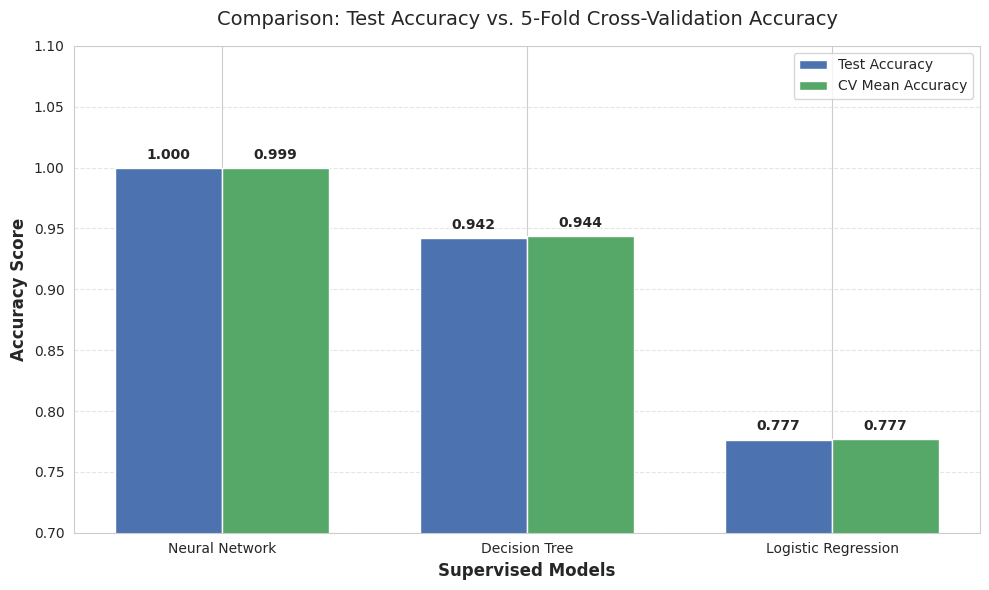

In [ ]:
supervised_models = ["Logistic Regression", "Decision Tree", "Neural Network"]

plot_df = results_df[results_df['Model'].isin(supervised_models)].copy().reset_index(drop=True)


plt.figure(figsize=(10, 6))
x = np.arange(len(plot_df))
width = 0.35


plt.bar(x - width/2, plot_df['Accuracy'], width, label='Test Accuracy', color='#4C72B0', edgecolor='white')
plt.bar(x + width/2, plot_df['CV_Mean_Accuracy'], width, label='CV Mean Accuracy', color='#55A868', edgecolor='white')


plt.xlabel('Supervised Models', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Comparison: Test Accuracy vs. 5-Fold Cross-Validation Accuracy', fontsize=14, pad=15)
plt.xticks(x, plot_df['Model'])
plt.ylim(0.7, 1.1)
plt.legend(loc='upper right', frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.5)


for i in range(len(plot_df)):
    # Test Accuracy
    plt.text(i - width/2, plot_df['Accuracy'].iloc[i] + 0.005,
             f"{plot_df['Accuracy'].iloc[i]:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')
    # CV Mean Accuracy
    plt.text(i + width/2, plot_df['CV_Mean_Accuracy'].iloc[i] + 0.005,
             f"{plot_df['CV_Mean_Accuracy'].iloc[i]:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')



plt.tight_layout()
plt.show()

Unsupervised Learning

Original shape: (61069, 80)
PCA explained variance ratio: [0.05706485 0.0444065 ]
Total variance explained: 0.10147134944050482
Optimal k: 2

--- Clustering Evaluation ---
Silhouette Score: 0.174
Adjusted Rand Index (ARI): -0.0019
Normalized Mutual Information (NMI): 0.0006

Cluster Distribution:
Cluster 0: 57539 samples (94.2%)
Cluster 1: 3530 samples (5.8%)

Cluster 0 (57539 samples):
  Class 0: 25769 (44.8%)
  Class 1: 31770 (55.2%)

Cluster 1 (3530 samples):
  Class 0: 1412 (40.0%)
  Class 1: 2118 (60.0%)


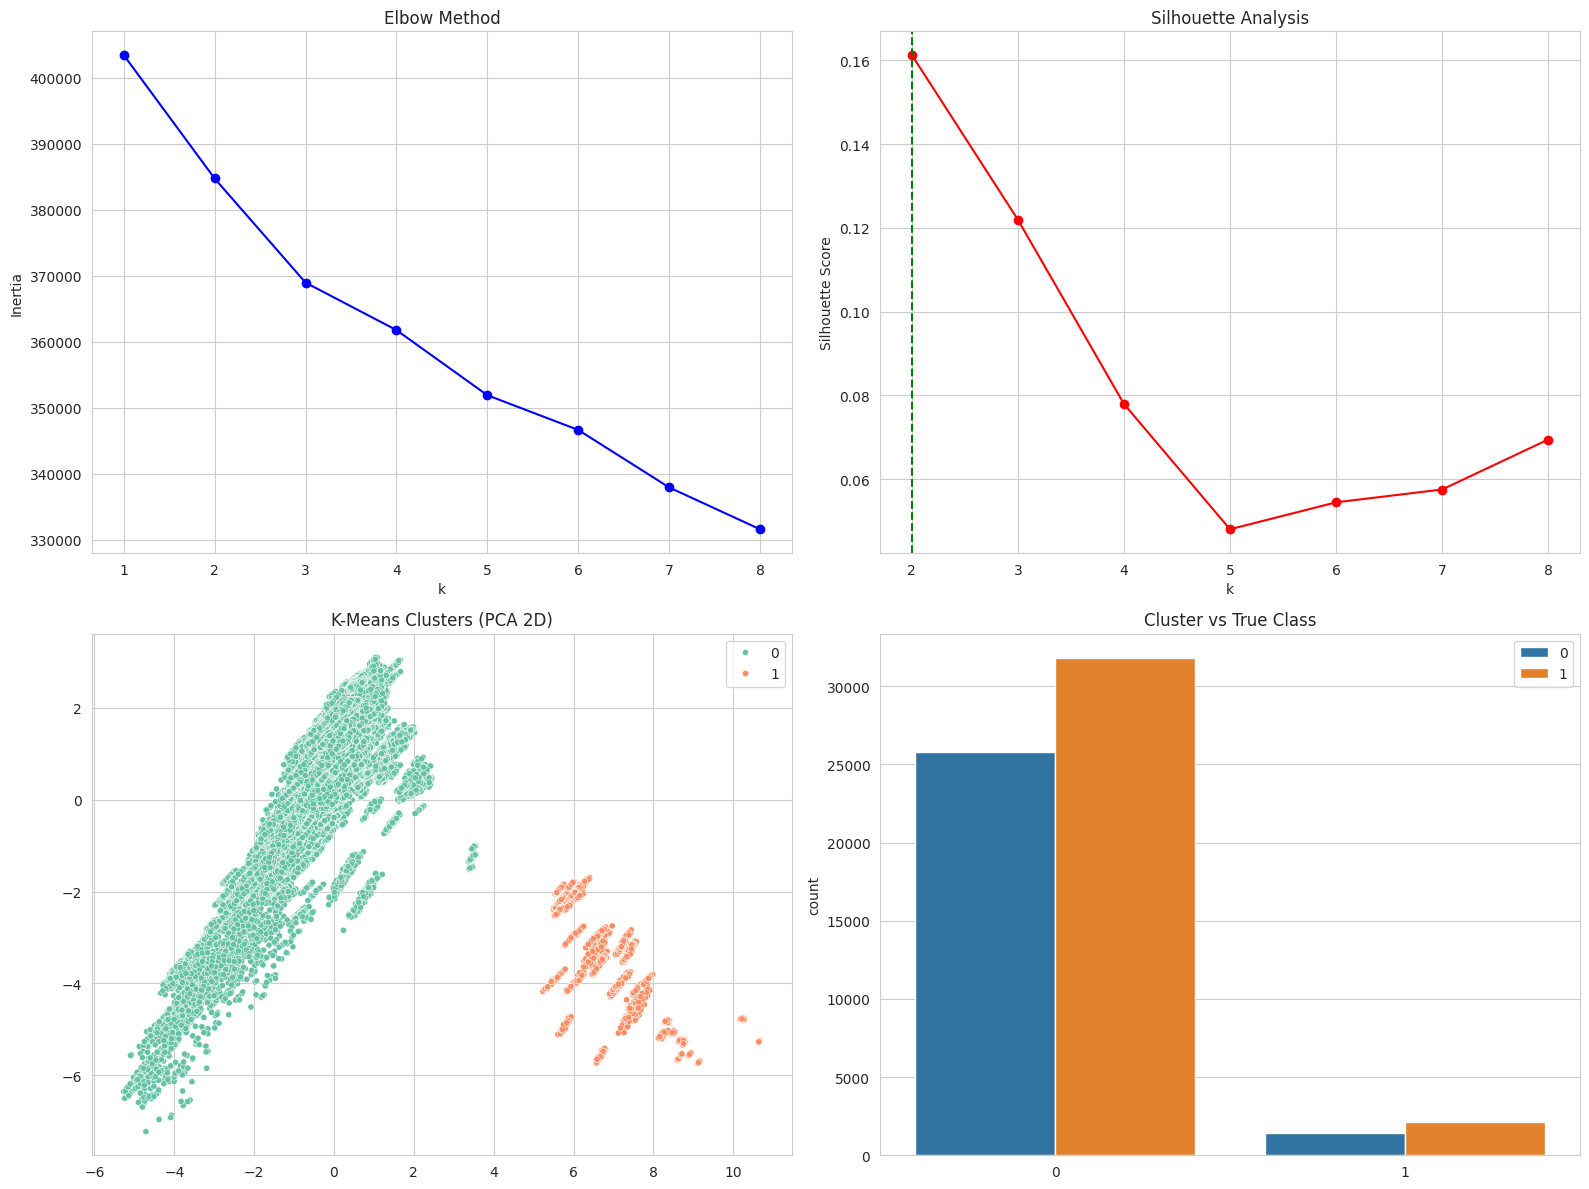

In [ ]:
# K-MEANS CLUSTERING (UNSUPERVISED)

# Features & Target
# X : feature matrix (already encoded)
# y : true labels (0/1) -> ONLY for evaluation, NOT training

X_clustering = X.copy()
y_clustering = y.copy()

print("Original shape:", X_clustering.shape)

#  Scaling (MANDATORY for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# PCA for Visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("PCA explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", np.sum(pca.explained_variance_ratio_))

# Sampling for Optimization
sample_size = 5000
np.random.seed(42)

if len(X_scaled) > sample_size:
    idx = np.random.choice(len(X_scaled), sample_size, replace=False)
    X_sample = X_scaled[idx]
else:
    X_sample = X_scaled

# Elbow Method
k_range = range(1, 9)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_sample)
    inertias.append(kmeans.inertia_)

#  Silhouette Score
k_range_sil = range(2, 9)
silhouette_scores = []

for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_sample)
    sil = silhouette_score(X_sample, labels)
    silhouette_scores.append(sil)

optimal_k = k_range_sil[np.argmax(silhouette_scores)]
print("Optimal k:", optimal_k)

# Final KMeans Model
final_kmeans = KMeans(
    n_clusters=optimal_k,
    init='k-means++',
    n_init=10,
    random_state=42
)

cluster_labels = final_kmeans.fit_predict(X_scaled)

# Evaluation
final_silhouette = silhouette_score(X_scaled, cluster_labels)
ari = adjusted_rand_score(y_clustering, cluster_labels)
nmi = normalized_mutual_info_score(y_clustering, cluster_labels)

print("\n--- Clustering Evaluation ---")
print("Silhouette Score:", round(final_silhouette, 3))
print("Adjusted Rand Index (ARI):", round(ari, 4))
print("Normalized Mutual Information (NMI):", round(nmi, 4))

#  Cluster Distribution
unique, counts = np.unique(cluster_labels, return_counts=True)

print("\nCluster Distribution:")
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} samples ({c/len(cluster_labels)*100:.1f}%)")

# Cluster vs Target
for cl in unique:
    mask = cluster_labels == cl
    total = mask.sum()
    class0 = (y_clustering[mask] == 0).sum()
    class1 = (y_clustering[mask] == 1).sum()

    print(f"\nCluster {cl} ({total} samples):")
    print(f"  Class 0: {class0} ({class0/total*100:.1f}%)")
    print(f"  Class 1: {class1} ({class1/total*100:.1f}%)")

#  Visualization
plt.figure(figsize=(16,12))

# Elbow plot
plt.subplot(2,2,1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)

# Silhouette plot
plt.subplot(2,2,2)
plt.plot(k_range_sil, silhouette_scores, 'ro-')
plt.axvline(optimal_k, linestyle='--', color='green')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.grid(True)

# PCA scatter
plt.subplot(2,2,3)
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=cluster_labels,
    palette='Set2',
    s=20,
    legend='full'
)
plt.title("K-Means Clusters (PCA 2D)")

# Cluster vs Class
plt.subplot(2,2,4)
sns.countplot(x=cluster_labels, hue=y_clustering)
plt.title("Cluster vs True Class")

plt.tight_layout()
plt.show()


In [ ]:
ari = adjusted_rand_score(y_clustering, cluster_labels)
nmi = normalized_mutual_info_score(y_clustering, cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")


Adjusted Rand Index (ARI): -0.0019
Normalized Mutual Information (NMI): 0.0006



K-MEANS AS CLASSIFIER METRICS
Accuracy  : 0.5549
Precision : 0.5549
Recall    : 1.0000
F1-score  : 0.7138

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27181
           1       0.55      1.00      0.71     33888

    accuracy                           0.55     61069
   macro avg       0.28      0.50      0.36     61069
weighted avg       0.31      0.55      0.40     61069



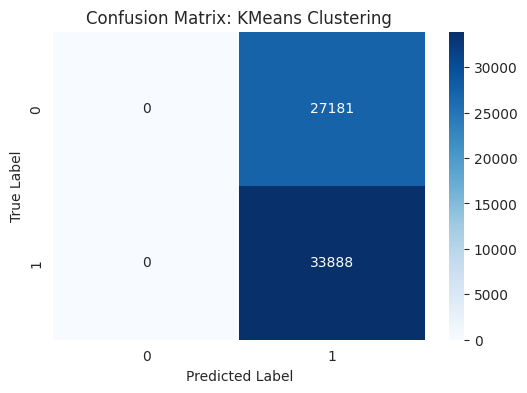

In [ ]:
#KMeans Performance Evaluation (Precision, Recall, F1)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#  (Mapping Clusters to True Labels)
# High (Positive)
cluster_map = {}
for cl in np.unique(cluster_labels):
    mask = (cluster_labels == cl)

    if y_clustering[mask].mean() > 0.5:
        cluster_map[cl] = 1
    else:
        cluster_map[cl] = 0

# Predicted Lebel
y_pred_kmeans = np.array([cluster_map[label] for label in cluster_labels])

# Metrices calculation
print("\n" + "="*30)
print("K-MEANS AS CLASSIFIER METRICS")
print("="*30)
print(f"Accuracy  : {accuracy_score(y_clustering, y_pred_kmeans):.4f}")
print(f"Precision : {precision_score(y_clustering, y_pred_kmeans):.4f}")
print(f"Recall    : {recall_score(y_clustering, y_pred_kmeans):.4f}")
print(f"F1-score  : {f1_score(y_clustering, y_pred_kmeans):.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_clustering, y_pred_kmeans))

# Confusion matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_clustering, y_pred_kmeans)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: KMeans Clustering")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


--- Final Model Performance Comparison ---
                 Model  Accuracy  Precision   Recall       F1      AUC
        Neural Network  0.999918   0.999852 1.000000 0.999926 1.000000
         Decision Tree  0.942197   0.977960 0.916495 0.946230 0.981210
   Logistic Regression  0.776568   0.800148 0.796253 0.798196 0.858252
K-Means (Unsupervised)  0.554913   0.554913 1.000000 0.713755 0.500000


<Figure size 1400x700 with 0 Axes>

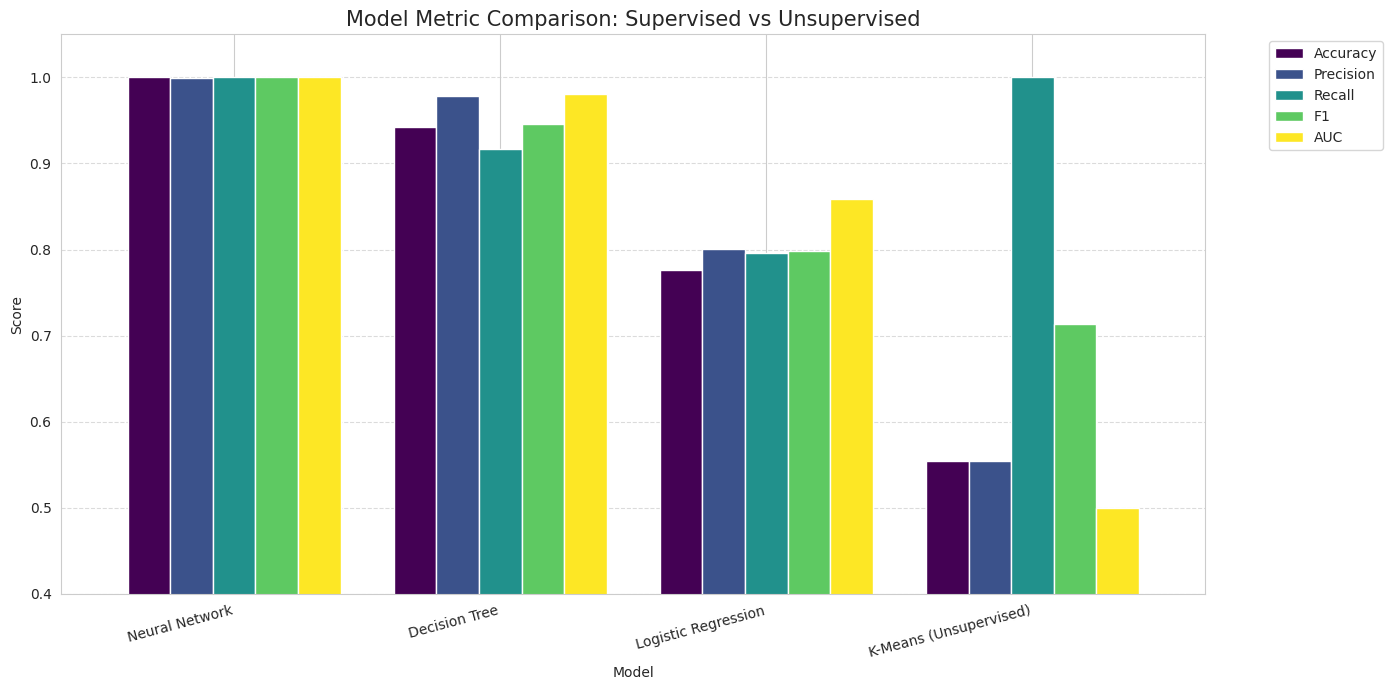

In [ ]:
kmeans_results = {
    "Model": "K-Means (Unsupervised)",
    "Accuracy": accuracy_score(y_clustering, y_pred_kmeans),
    "Precision": precision_score(y_clustering, y_pred_kmeans, zero_division=0),
    "Recall": recall_score(y_clustering, y_pred_kmeans, zero_division=0),
    "F1": f1_score(y_clustering, y_pred_kmeans, zero_division=0),
    "AUC": 0.50
}


results = []
models_to_test = {
    "Logistic Regression": (lr_classifier, X_test_final),
    "Decision Tree": (dt_classifier, X_test_final),
    "Neural Network": (mlp_model, X_test_final)
}

for name, (model, x_data) in models_to_test.items():
    if name == "Neural Network":
        y_prob = model.predict(x_data, verbose=0).flatten()
        y_pred = (y_prob > 0.5).astype(int)
    else:
        y_prob = model.predict_proba(x_data)[:, 1]
        y_pred = model.predict(x_data)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    })


results.append(kmeans_results)


results_df = pd.DataFrame(results)
results_df = results_df.sort_values("Accuracy", ascending=False)

print("\n--- Final Model Performance Comparison ---")
print(results_df.to_string(index=False))


plt.figure(figsize=(14, 7))


ax = results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1", "AUC"]].plot(
    kind="bar", figsize=(14, 7), width=0.8, colormap='viridis'
)


plt.ylim(0.4, 1.05)
plt.xticks(rotation=15, ha="right")
plt.title("Model Metric Comparison: Supervised vs Unsupervised", fontsize=15)
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

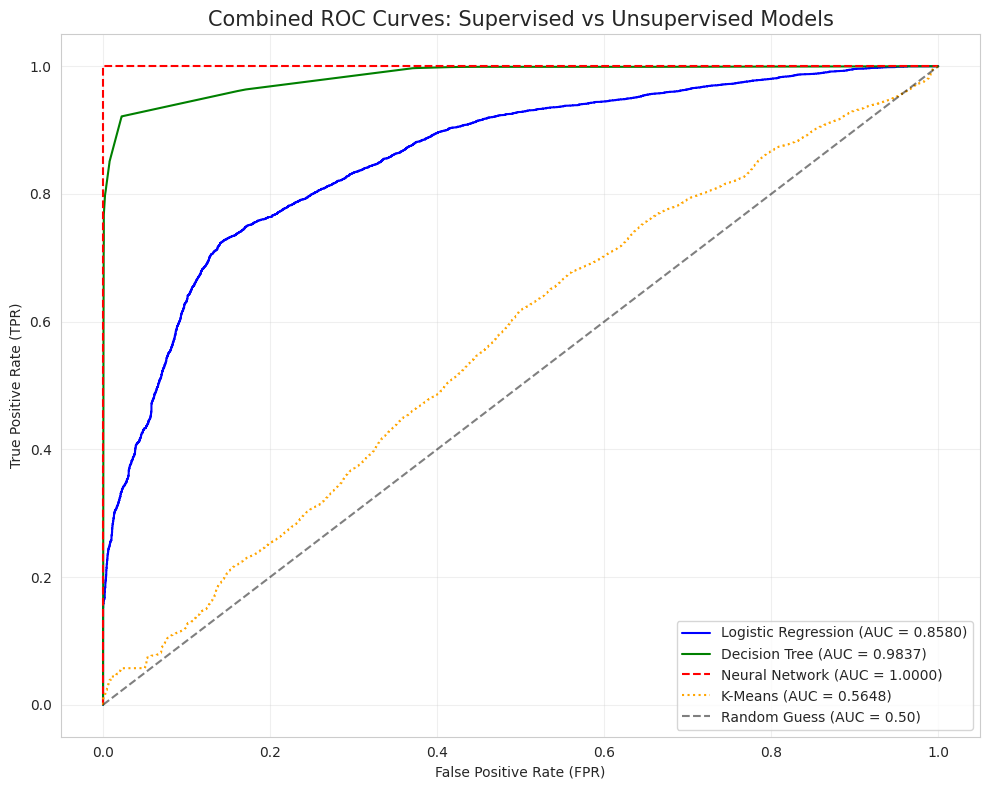

In [ ]:

dists = final_kmeans.transform(X_scaled)


pos_cl = 1
neg_cl = 0
raw_score_km = dists[:, neg_cl] - dists[:, pos_cl]

y_prob_km = (raw_score_km - raw_score_km.min()) / (raw_score_km.max() - raw_score_km.min())

plt.figure(figsize=(10, 8))

# --- Logistic Regression ---
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.4f})', color='blue')

# --- Decision Tree ---
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.4f})', color='green')

# --- Neural Network ---
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob) # y_prob আপনার NN এর প্রেডিকশন
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc(fpr_nn, tpr_nn):.4f})', color='red', linestyle='--')

# --- K-Means (Unsupervised) ---
fpr_km, tpr_km, _ = roc_curve(y_clustering, y_prob_km)
plt.plot(fpr_km, tpr_km, label=f'K-Means (AUC = {auc(fpr_km, tpr_km):.4f})', color='orange', linestyle=':')

# Diagonal Line (Random Classifier)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Guess (AUC = 0.50)')



plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Combined ROC Curves: Supervised vs Unsupervised Models', fontsize=15)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
#Sample Test


num_samples = 100
random_indices = np.random.choice(len(X_test_final), num_samples, replace=False)

summary_results = []

print(f"{'Index':<7} | {'Actual':<10} | {'LR Pred':<10} | {'DT Pred':<10} | {'NN Pred':<10}")
print("-" * 60)

for idx in random_indices:
    sample_input = X_test_final.iloc[[idx]]

    # Actual Label
    actual = "Poisonous" if y_test[idx] == 1 else "Edible"

    # Logistic Regression
    lr_p = "Poisonous" if lr_classifier.predict(sample_input)[0] == 1 else "Edible"

    # Decision Tree
    dt_p = "Poisonous" if dt_classifier.predict(sample_input)[0] == 1 else "Edible"

    # Neural Network
    nn_prob = mlp_model.predict(sample_input, verbose=0)
    nn_p = "Poisonous" if nn_prob > 0.5 else "Edible"

    print(f"{idx:<7} | {actual:<10} | {lr_p:<10} | {dt_p:<10} | {nn_p:<10}")

    summary_results.append({
        'Actual': actual,
        'LR': lr_p,
        'DT': dt_p,
        'NN': nn_p
    })

# --- Final Accuracy Summary for these samples ---
lr_correct = sum(1 for r in summary_results if r['Actual'] == r['LR'])
dt_correct = sum(1 for r in summary_results if r['Actual'] == r['DT'])
nn_correct = sum(1 for r in summary_results if r['Actual'] == r['NN'])

print("-" * 60)
print(f"Summary of {num_samples} Random Samples:")
print(f"Logistic Regression Correct: {lr_correct}/{num_samples}")
print(f"Decision Tree Correct      : {dt_correct}/{num_samples}")
print(f"Neural Network Correct     : {nn_correct}/{num_samples}")

Index   | Actual     | LR Pred    | DT Pred    | NN Pred   
------------------------------------------------------------
1388    | Edible     | Edible     | Edible     | Edible    
9872    | Edible     | Edible     | Edible     | Edible    
1854    | Edible     | Edible     | Edible     | Edible    
10645   | Poisonous  | Poisonous  | Poisonous  | Poisonous 
4140    | Edible     | Edible     | Edible     | Edible    
6759    | Poisonous  | Edible     | Poisonous  | Poisonous 
11661   | Poisonous  | Poisonous  | Poisonous  | Poisonous 
10976   | Edible     | Poisonous  | Edible     | Edible    
10283   | Edible     | Edible     | Edible     | Edible    
7974    | Edible     | Poisonous  | Edible     | Edible    
8678    | Poisonous  | Poisonous  | Poisonous  | Poisonous 
11453   | Edible     | Edible     | Edible     | Edible    
427     | Edible     | Edible     | Edible     | Edible    
6852    | Poisonous  | Poisonous  | Edible     | Poisonous 
9085    | Poisonous  | Edible     | Poi